In [1]:
sc.list_packages()
sc.install_pypi_package("pandas==1.2.2")
sc.install_pypi_package("matplotlib==3.1.1", "https://pypi.org/simple")
sc.install_pypi_package("seaborn", "https://pypi.org/simple")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1649434997233_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

absl-py (0.12.0)
astor (0.8.0)
astunparse (1.6.3)
aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
bleach (3.3.0)
boto (2.49.0)
cachetools (4.1.1)
certifi (2020.12.5)
chardet (4.0.0)
click (7.1.2)
cryptography (3.2.1)
cycler (0.11.0)
docutils (0.14)
flatbuffers (1.12)
funcsigs (1.0.2)
gast (0.4.0)
google-auth (1.23.0)
google-auth-oauthlib (0.4.2)
google-pasta (0.2.0)
grpcio (1.36.1)
h5py (2.10.0)
html5lib (1.1)
idna (2.10)
importlib-metadata (2.0.0)
jmespath (0.10.0)
joblib (1.0.1)
Keras-Applications (1.0.8)
Keras-Preprocessing (1.1.2)
kiwisolver (1.4.2)
lockfile (0.11.0)
lxml (4.6.2)
Markdown (3.3.4)
matplotlib (3.1.1)
mysqlclient (1.4.2)
nltk (3.5)
nose (1.3.4)
numpy (1.21.5)
oauthlib (3.1.0)
opt-einsum (2.3.2)
packaging (20.9)
pandas (1.2.2)
patsy (0.5.2)
pip (9.0.1)
protobuf (3.15.6)
py-dateutil (2.2)
pyasn1 (0.4.8)
pyasn1-modules (0.2.8)
pyparsing (3.0.7)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.1)
PyYAML (5.4.1)
re

# Importing Necessary Libraries

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import isnan, when, count, col
import pyspark.sql.functions
from pyspark.sql.types import *
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Load Data into Dataframe

In [3]:
df = spark.read.format("parquet")\
    .option("header","true")\
    .option("inferschema","true")\
    .load("s3://group23project/data_cleaning/")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Output from printSchema()**

In [5]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- WEEKDAY: integer (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- FLIGHT_STATUS: integer (nullable = true)

# Columns Summary

- FL_DATE = Date of the Flight
- OP_CARRIER = Airline Identifier
- OP_CARRIER_FL_NUM = Flight Number
- ORIGIN = Starting Airport Code
- DEST = Destination Airport Code
- CRS_DEP_TIME = Planned Departure Time
- DEP_TIME = Actual Departure Time
- DEP_DELAY = Total Delay on Departure in minutes
- TAXI_OUT = The time duration elapsed between departure from the origin airport gate and wheels off
- WHEELS_OFF = The time point that the aircraft's wheels leave the ground
- WHEELS_ON = The time point that the aircraft'ss wheels touch on the ground
- TAXI_IN = The time duration elapsed between wheels-on and gate arrival at the destination airport
- CRS_ARR_TIME = Planned arrival time
- ARR_TIME = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL
- ARR_DELAY = Total Delay on Arrival in minutes
- CANCELLED = Flight Cancelled (1 = cancelled)
- CANCELLATION_CODE = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

# Display the Data Dimensions

In [6]:
print((df.count(), len(df.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(60431020, 20)

 **Number of Columns**

In [7]:
print("Number of Columns", len(df.columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Columns 20

In [185]:
df0 = spark.read.format("parquet")\
    .option("header","true")\
    .option("inferschema","true")\
    .load("s3://vitaproject23/cleandata/")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
df0.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- WEEKDAY: integer (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- FLIGHT_STATUS: integer (nullable = true)

In [10]:
df.rdd.getNumPartitions()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

6

# Visualization

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Number of Airports

In [14]:
df1 = df[["DEST"]]
df1.drop_duplicates().count()  

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

377

In [15]:
df1.distinct().count()
print("Number of Airports:",df1.distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Airports: 377

# Top Flights by Airlines.

**The figure below shows the highest number of flights by each Airline.**

In [230]:
df_airline =df0.groupBy('OP_CARRIER').count().orderBy(col('count').desc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

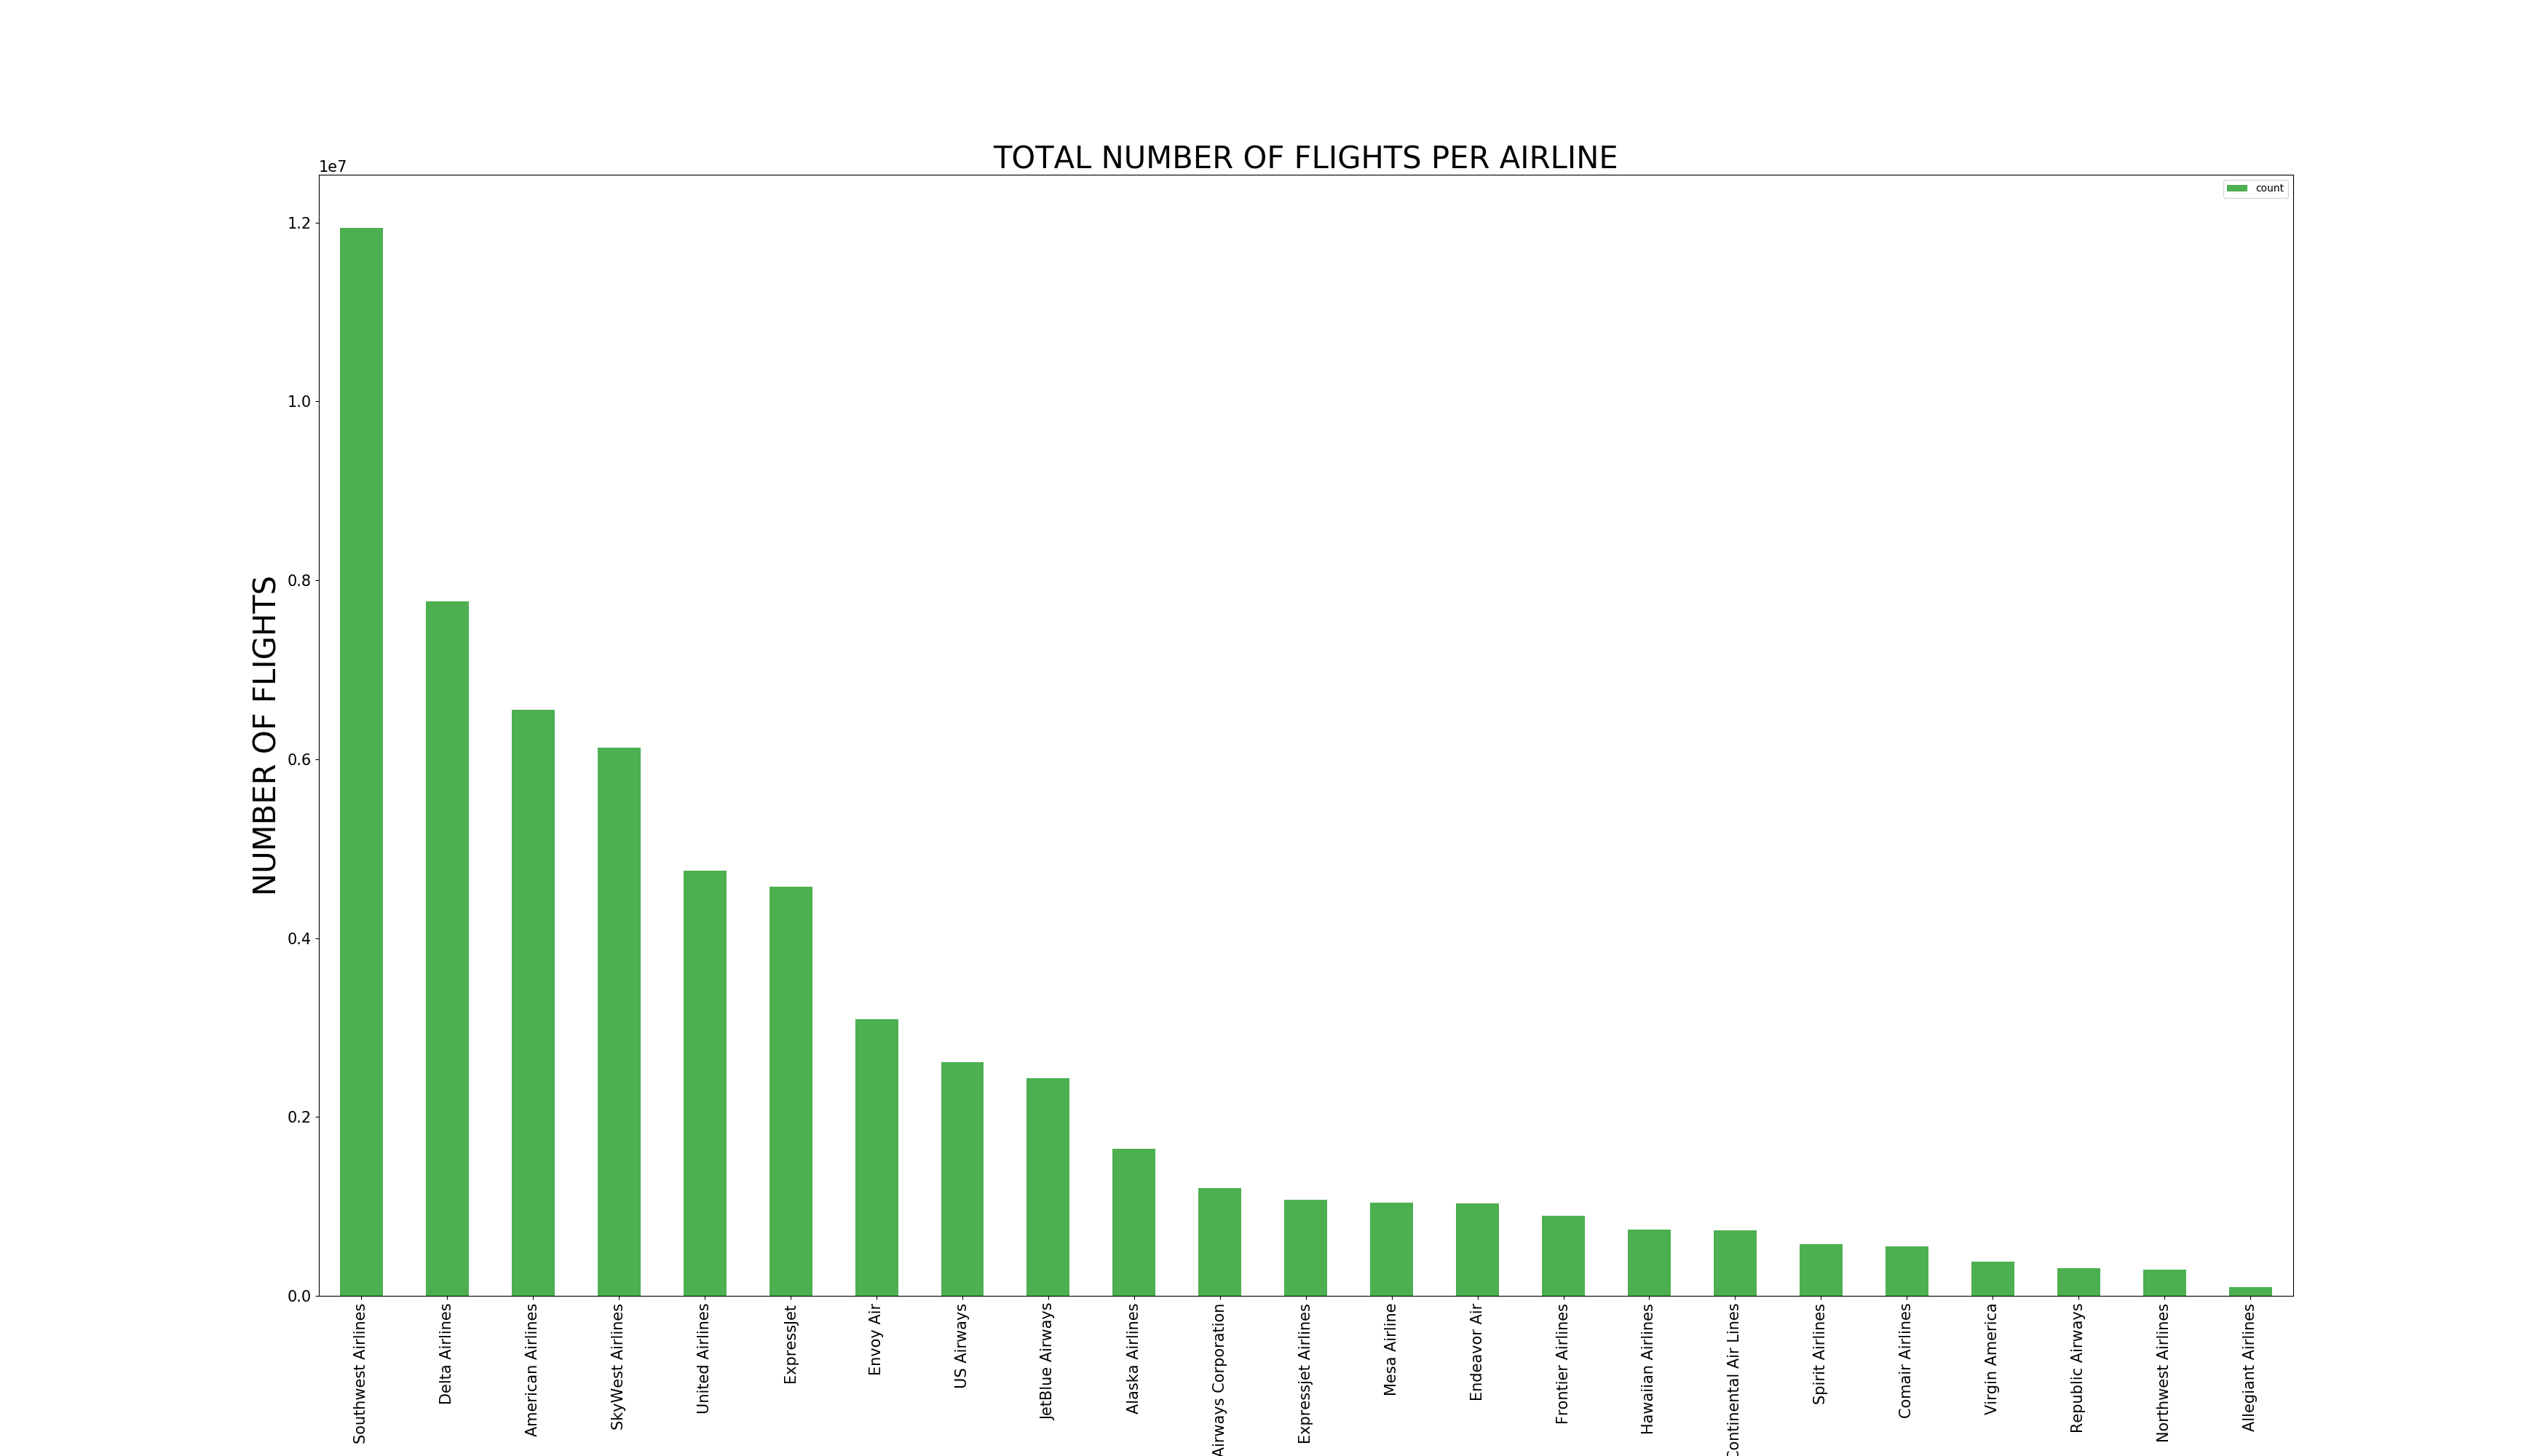

In [253]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [35,20]
df_airline.plot.bar( color = "#4CAF50")
plt.style.use('seaborn-deep')
plt.title('TOTAL NUMBER OF FLIGHTS PER AIRLINE', fontsize=30)
plt.xlabel('AIRLINES', fontsize=30)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=30)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
xpos = np.arange(len(df_airline.OP_CARRIER))
plt.xticks(xpos,df_airline['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt

# Number of Delayed Flights by Airline

In [20]:
import pyspark.sql.functions as F 
TDFbyA=df.groupBy('OP_CARRIER').agg(F.sum("FLIGHT_STATUS")).orderBy(col("sum(FLIGHT_STATUS)").desc())
TDFbyA=TDFbyA.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

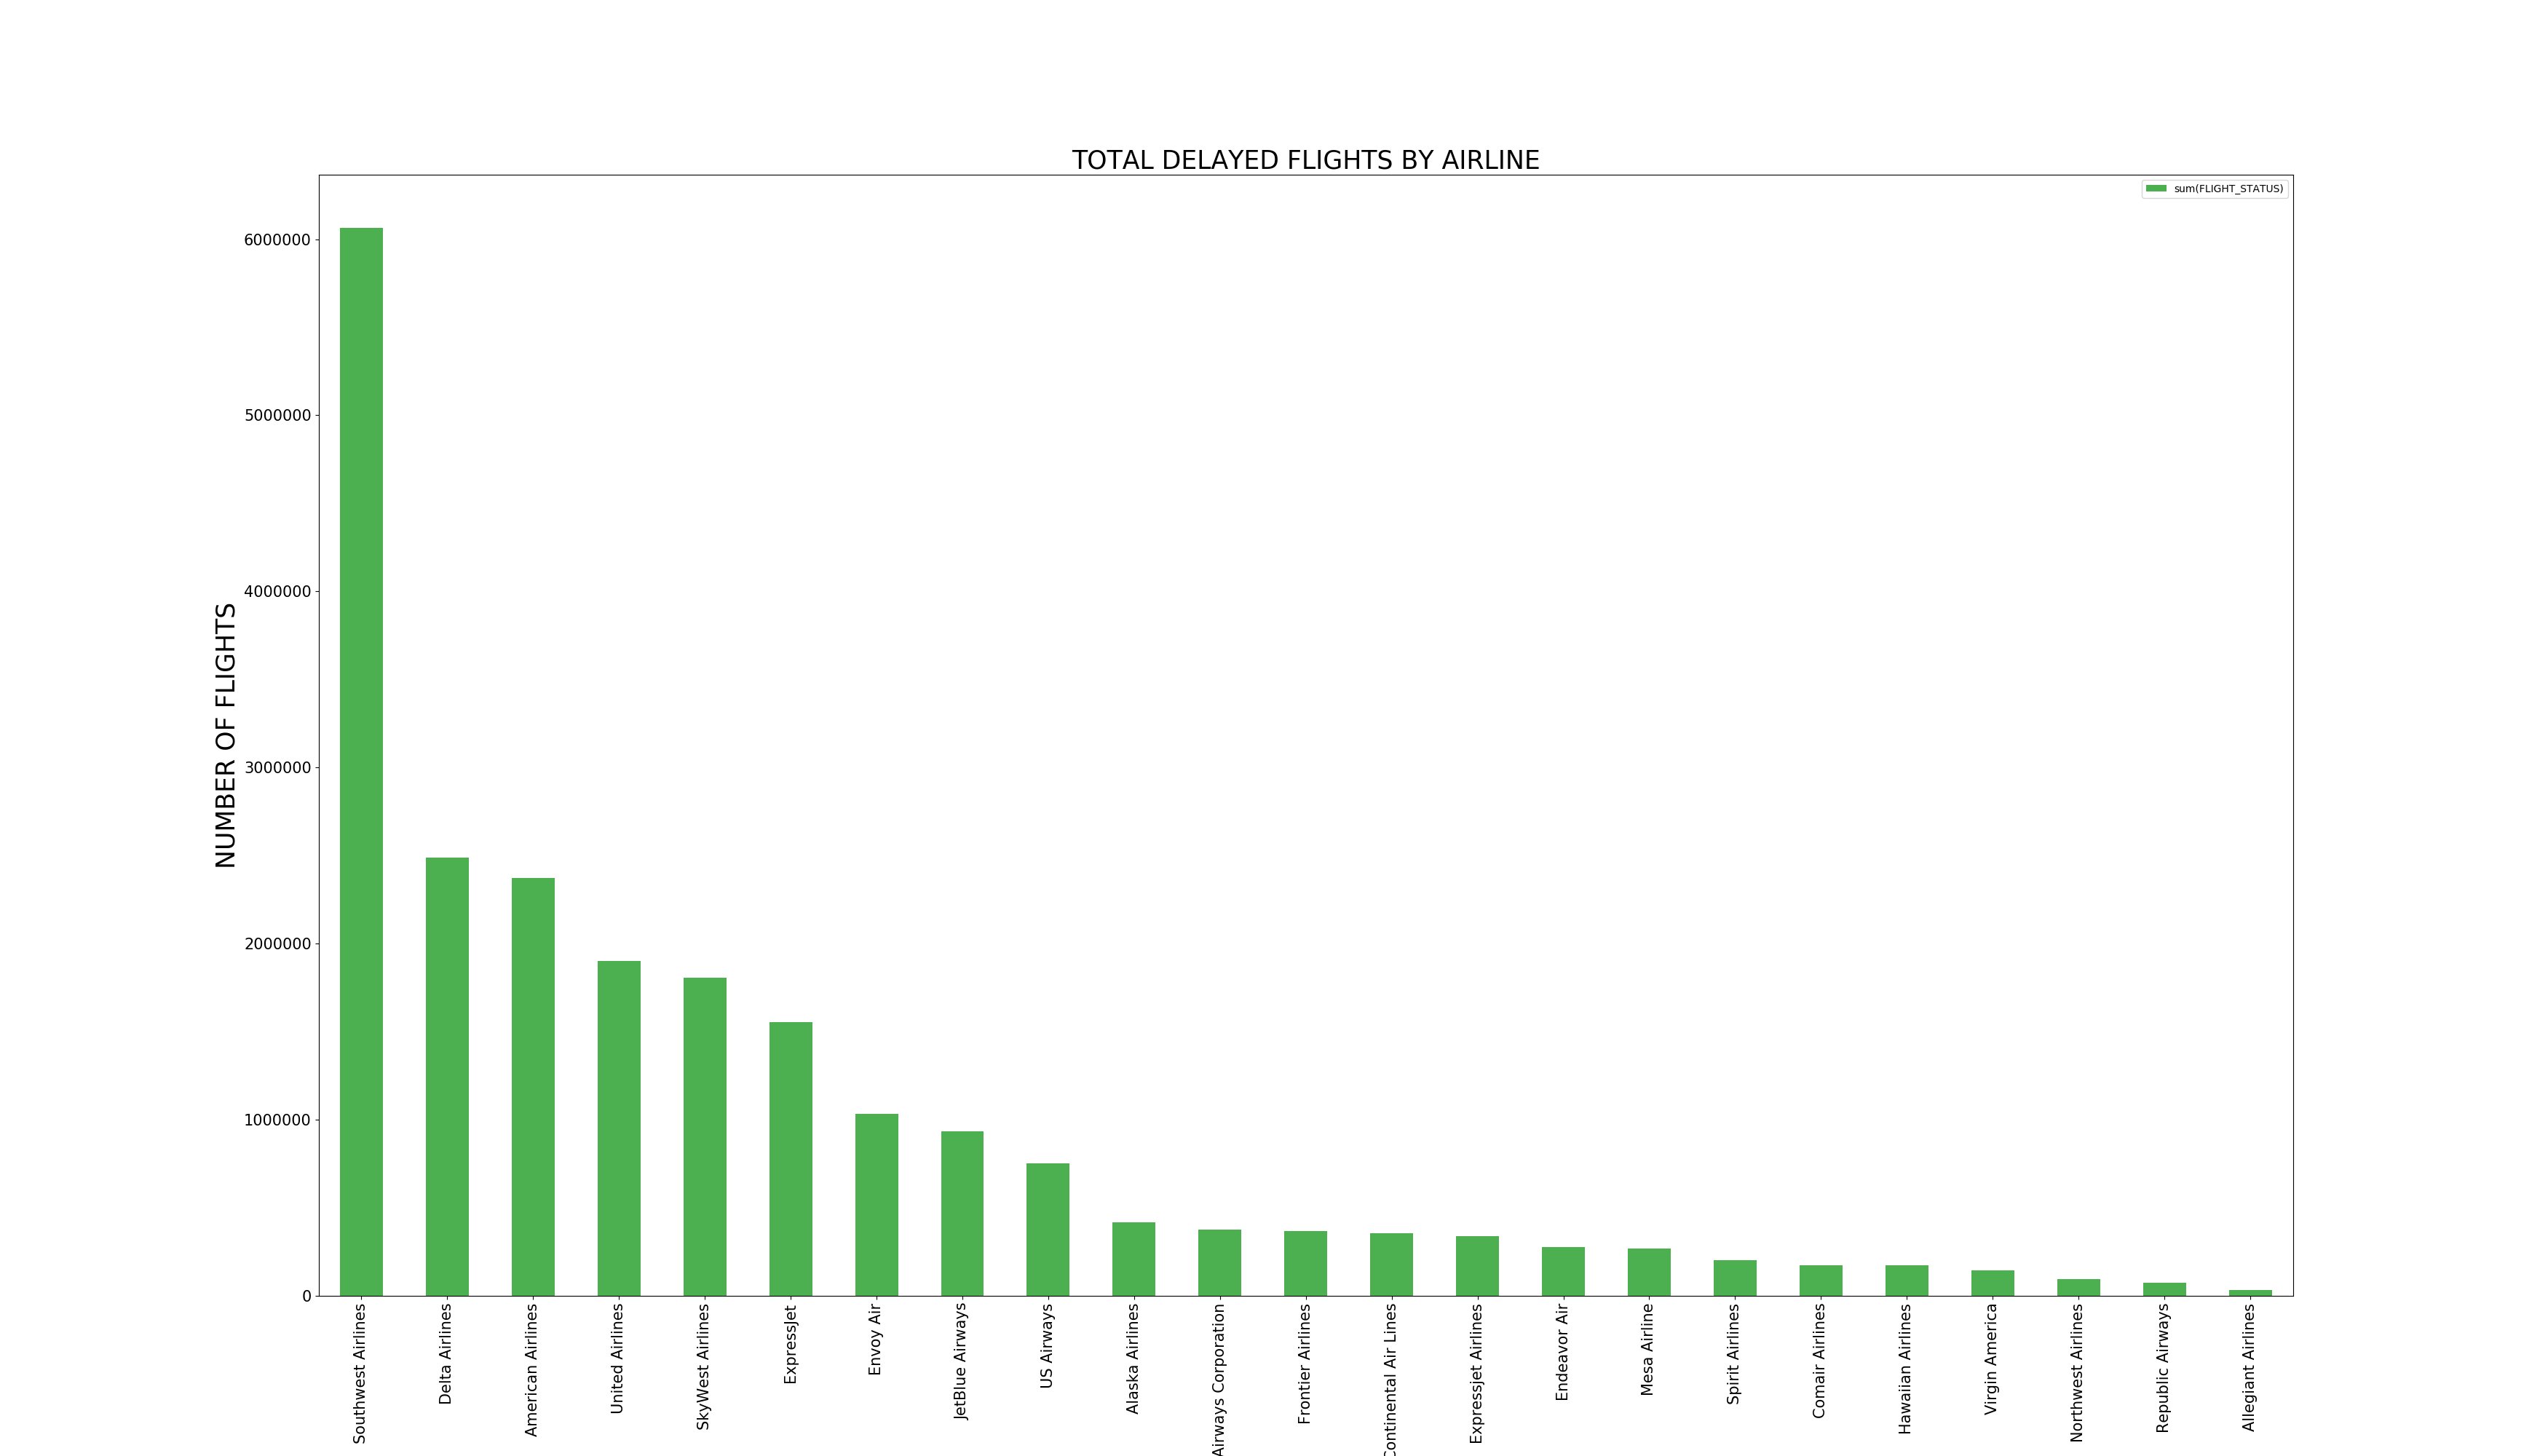

In [27]:
plt.rcParams['figure.figsize'] = [35,20]
TDFbyA.plot.bar( color = "#4CAF50")
plt.style.use('seaborn-deep')
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=25)
plt.xlabel('AIRLINES', fontsize=25)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=25)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
xpos = np.arange(len(TDFbyA.OP_CARRIER))
plt.xticks(xpos,TDFbyA['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt



From this plot we can now extract the top 5 airlines with the most delayed flights, which are:

 1. Southwest Airlines
 2. American Airlines
 3. SkyWest Airlines
 4. Delta Airlines
 5. United Airlines

Lets get into the Percentage of delayed flights and the average delay time per airline.

# Percentage of Delay Flights per Airline.

The first thing to calculate is the percentage of delayed flights so that we can do proper comparisons with each airline. In other words, airlines would want to be below the average percentage of delayed flights to be in an acceptable position, so that magic number will represent our threshold. Airlines above would be by common sense the ones that travelers would want to avoid as it means you those will have the most delays.

In order to calculate the percentage of delayed flights by airline, I will use the engineered column 'FLIGHT_STATUS' by adding all it's values per airline and converting them into percentage for better understanding.



In [257]:
test_1 = df0.groupby('OP_CARRIER').count()
test_1 =test_1.select(col('OP_CARRIER').alias("OP_CARRIER_1"),'count')
test_2=df0.groupBy('OP_CARRIER').agg(F.sum("FLIGHT_STATUS"))
comb_df=test_1.join(test_2,test_1.OP_CARRIER_1 ==  test_2.OP_CARRIER,"inner")
comb_df = comb_df.withColumn("percentage", col("sum(FLIGHT_STATUS)")*100/col("count"))
comb_df_1=comb_df.select("OP_CARRIER","percentage").orderBy(col('percentage').desc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

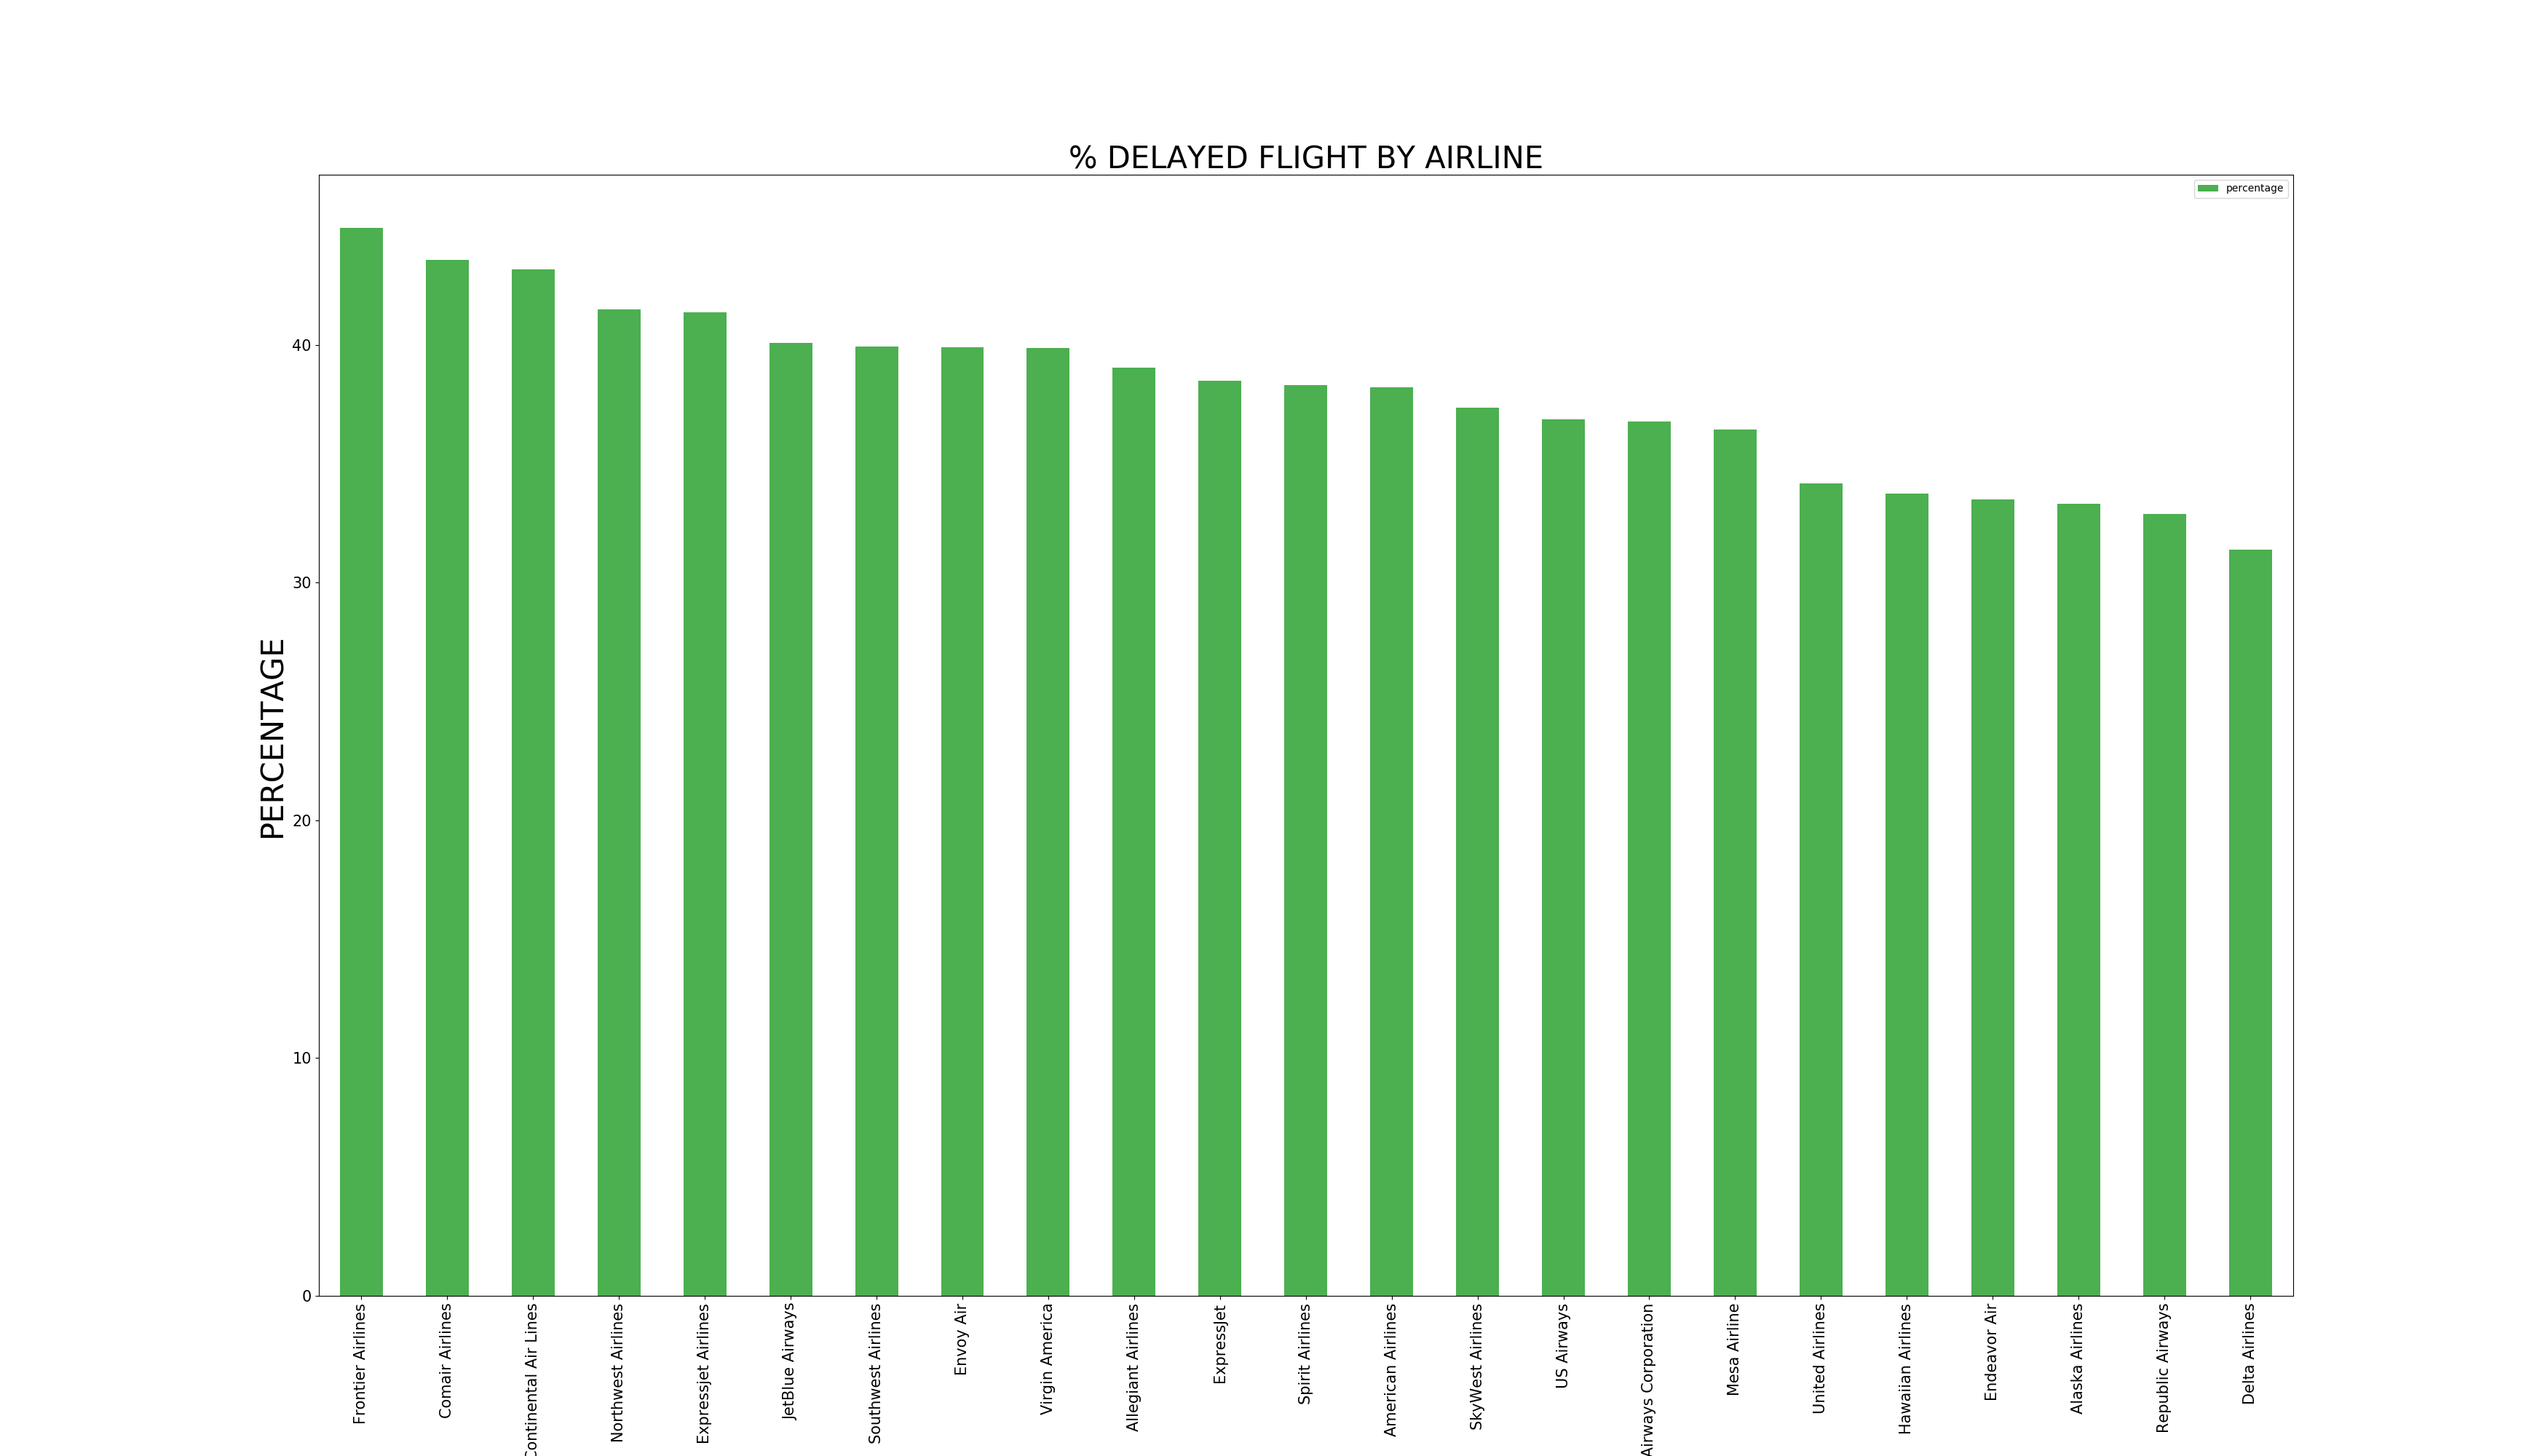

In [258]:
plt.rcParams['figure.figsize'] = [35,20]
comb_df_1.plot.bar( color = "#4CAF50")
plt.style.use('seaborn-deep')
plt.title('% DELAYED FLIGHT BY AIRLINE', fontsize=30)
plt.xlabel('AIRLINES', fontsize=30)
plt.ylabel('PERCENTAGE', fontsize=30)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
xpos = np.arange(len(comb_df_1.OP_CARRIER))
plt.xticks(xpos,comb_df_1['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt

Observation based on above fig is:

Frontier airlines have highest percentage of delay.

Delta Airlines is the second airline with the highest number of flights, at the same time is the forth with the highest number of delayed flights, but in terms of percentage of delayed flights, it is the airline with the best percentage at 29.50%. That represents 8% below the threshold.

Southwest Airlines has the most flights and most delayed flights as well, but as our last plot suggests, it is not the worst, it is the 5th worst and still is above the threshold value by over 3%, so definitely not great compared to Delta Airlines

SkyWest and United Airlines, are the number 4 and 5 respectively in terms of number of flights, and third and 5th in terms of number of delayed flights. However, both are in a good position in terms of percentages of delayed flights by being below the threshold. So a couple more that are performing well.

# Determining the Delay(Time) in this dataset

## Total Minutes Delayed by Airline
This next plot is based on the total number of minutes delayed by each airline.

In [29]:
TotalDelay=df.groupBy('OP_CARRIER').agg(F.sum("ARR_DELAY")).orderBy(col("sum(ARR_DELAY)").desc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

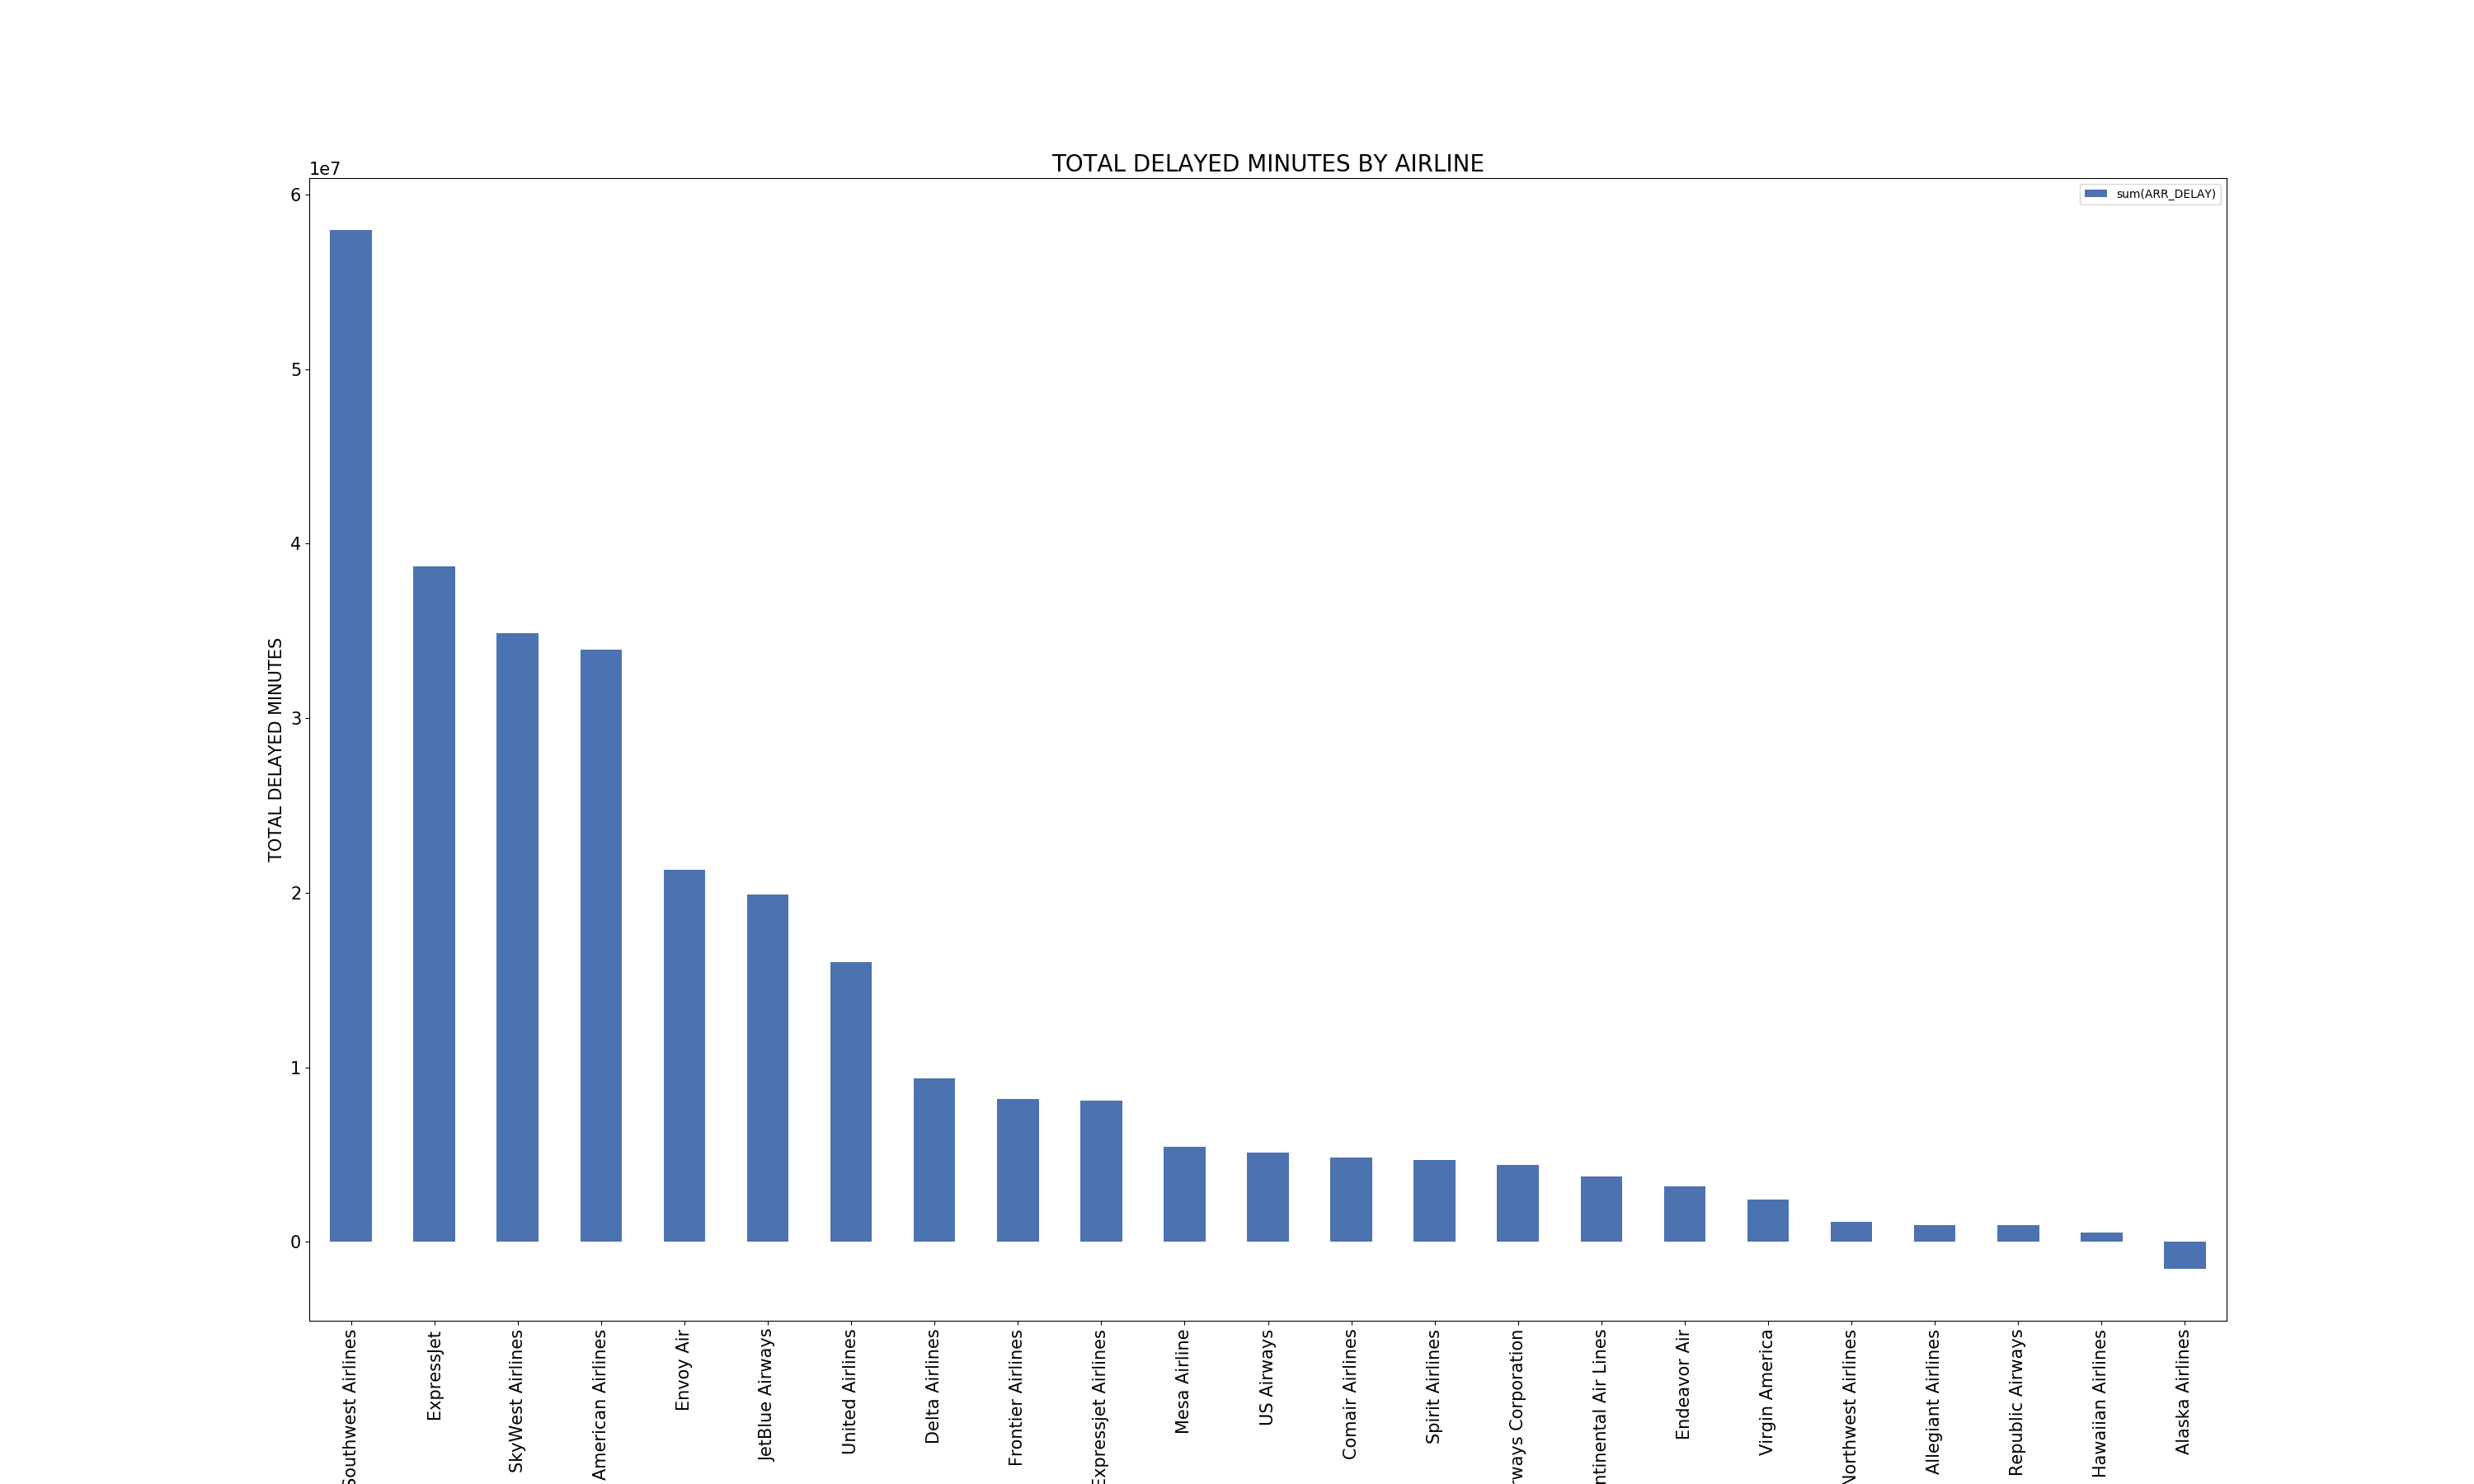

In [30]:
plt.rcParams['figure.figsize'] = [30,18]
plt.style.use('seaborn-deep')
TotalDelay.plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINES', fontsize=15)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
xpos = np.arange(len(TotalDelay.OP_CARRIER))
plt.xticks(xpos,TotalDelay['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt

Southwest Airline has consideribly largest delay by mins.

This is another plot that reveals about Alaska Airlines.Even when it is at the top in terms of number of delayed flights, the total number of minutes delayed is negative and it is the lowest of all. It is negative because there are a lot of flights that arrive earlier than what was expected, and therefore the ARR_DELAY is a negative number instead of a positive one.

## AVG Delay Time by Airline

In [32]:
from pyspark.sql.functions import col
avgcol = df.groupBy('OP_CARRIER').agg(F.avg(col("ARR_DELAY"))).orderBy(col("avg(ARR_DELAY)").desc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

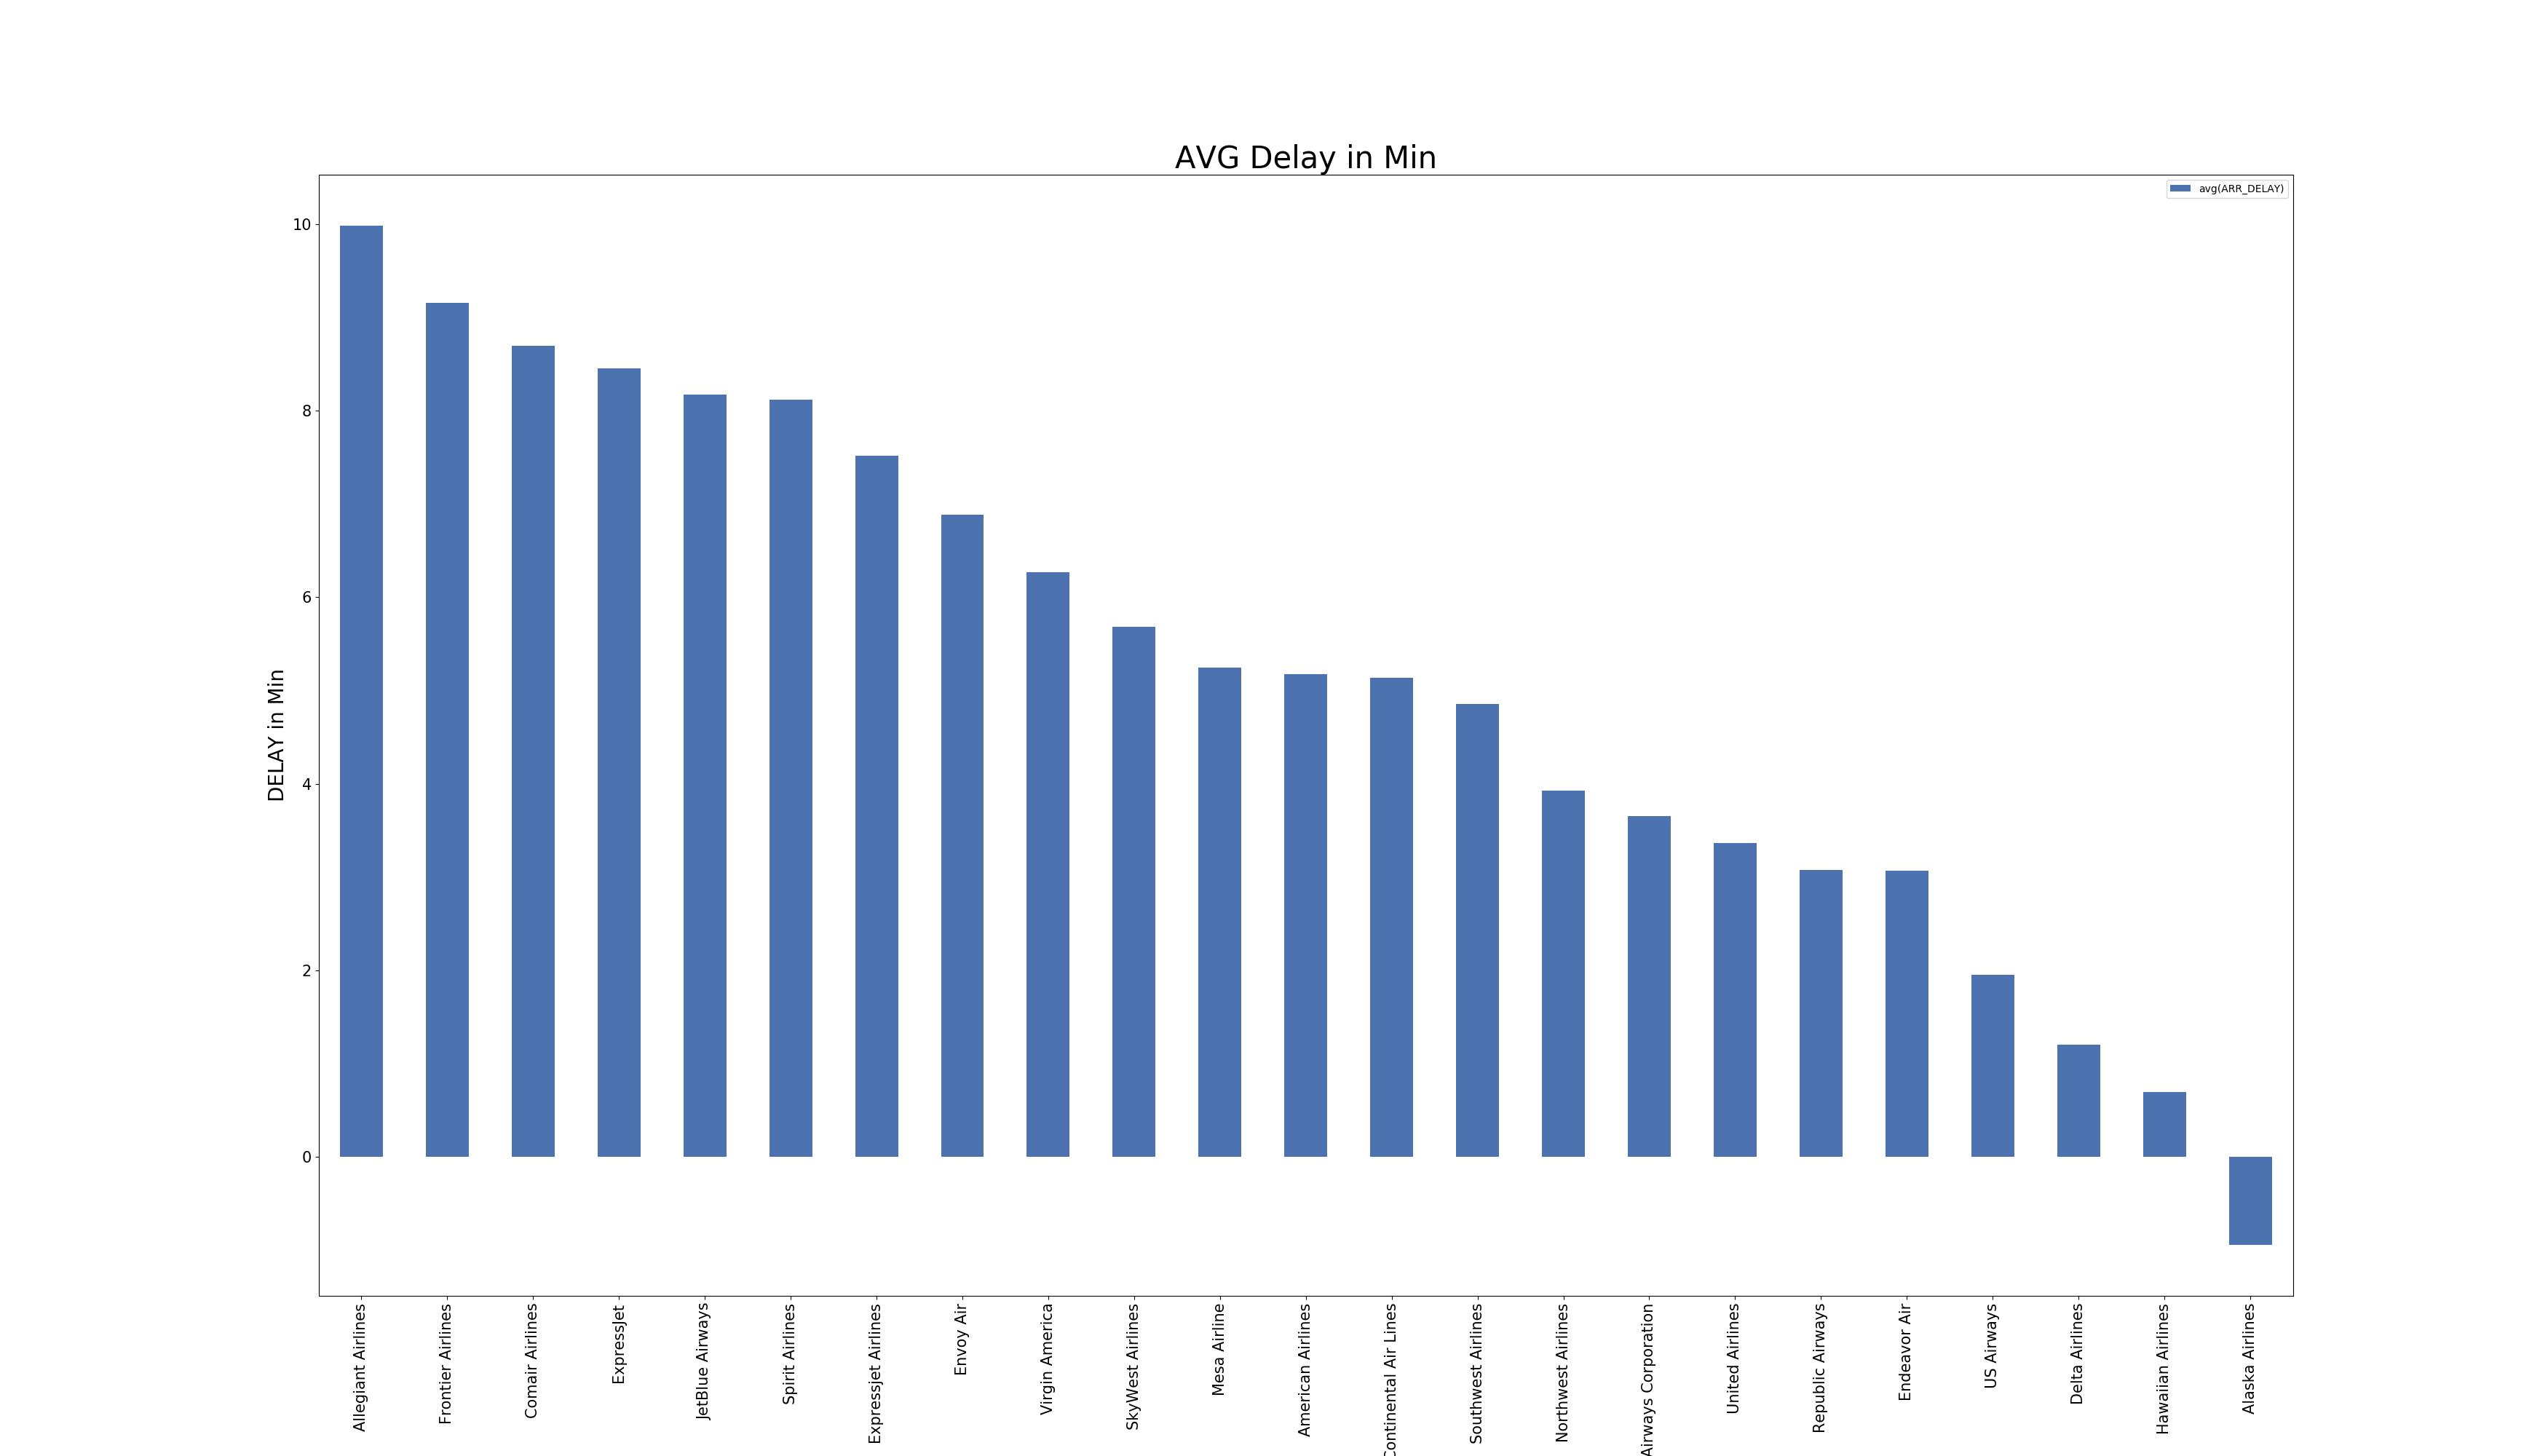

In [41]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [35,20]
plt.style.use('seaborn-deep')
avgcol.plot.bar()
plt.title('AVG Delay in Min', fontsize=30)
plt.xlabel('OP_CARRIER', fontsize=20)
plt.ylabel('DELAY in Min', fontsize=20)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
xpos = np.arange(len(avgcol.OP_CARRIER))
plt.xticks(xpos,avgcol['OP_CARRIER'],rotation = 90)
plt.show();
%matplot plt

# Impact of Delays (Departure Delay vs. Arrival Delay)

In this visualization what We will try to do is analyze both, the departure and the arrival delay. We want to see which one of both has a bigger impact on the plane being late overall.

If the departure is on time and the flight is late on arrival, then this means that something else increased your elapse time, which is supposed to be the planned time needed for the flight trip.

This plot should also confirm the theory that some airlines when having a delay from their departure try to compensate by reducing their air time. 

In order to do this, We will use a different type of plot, where We will overlay the ARR_DELAY over the DEP_DELAY and see how they look.


In [42]:
df.groupBy('OP_CARRIER').agg(F.mean("DEP_DELAY")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|          OP_CARRIER|      avg(DEP_DELAY)|
+--------------------+--------------------+
|     United Airlines|  10.814191087692846|
|    Republic Airways|   7.276651018342283|
|Continental Air L...|   8.936584140300285|
|     Comair Airlines|  11.094905243054864|
|        Mesa Airline|  7.0600081637211165|
|      Virgin America|  10.482099022259206|
| Expressjet Airlines|   8.472369157948204|
|          ExpressJet|  11.923083933111561|
|    SkyWest Airlines|   7.805092557858855|
|   Frontier Airlines|  11.467015476235717|
|     JetBlue Airways|  12.368241298449748|
|  Northwest Airlines|   5.674408904607769|
|  Allegiant Airlines|  12.902239684007059|
|   American Airlines|   9.456791229261714|
|        Endeavor Air|   7.123004417862019|
|      Delta Airlines|   7.437674091074725|
|     Alaska Airlines|  1.6362907039075993|
|     Spirit Airlines|  11.703562025197819|
|   Hawaiian Airlines|-0.03454193772436713|
|AirTran Airways C...|   6.14108

In [45]:
dep_df=df.groupBy('OP_CARRIER').agg(F.mean("DEP_DELAY"))
arr_df=df.groupBy('OP_CARRIER').agg(F.mean("ARR_DELAY"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
dep_df=dep_df.toPandas()
arr_df=arr_df.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

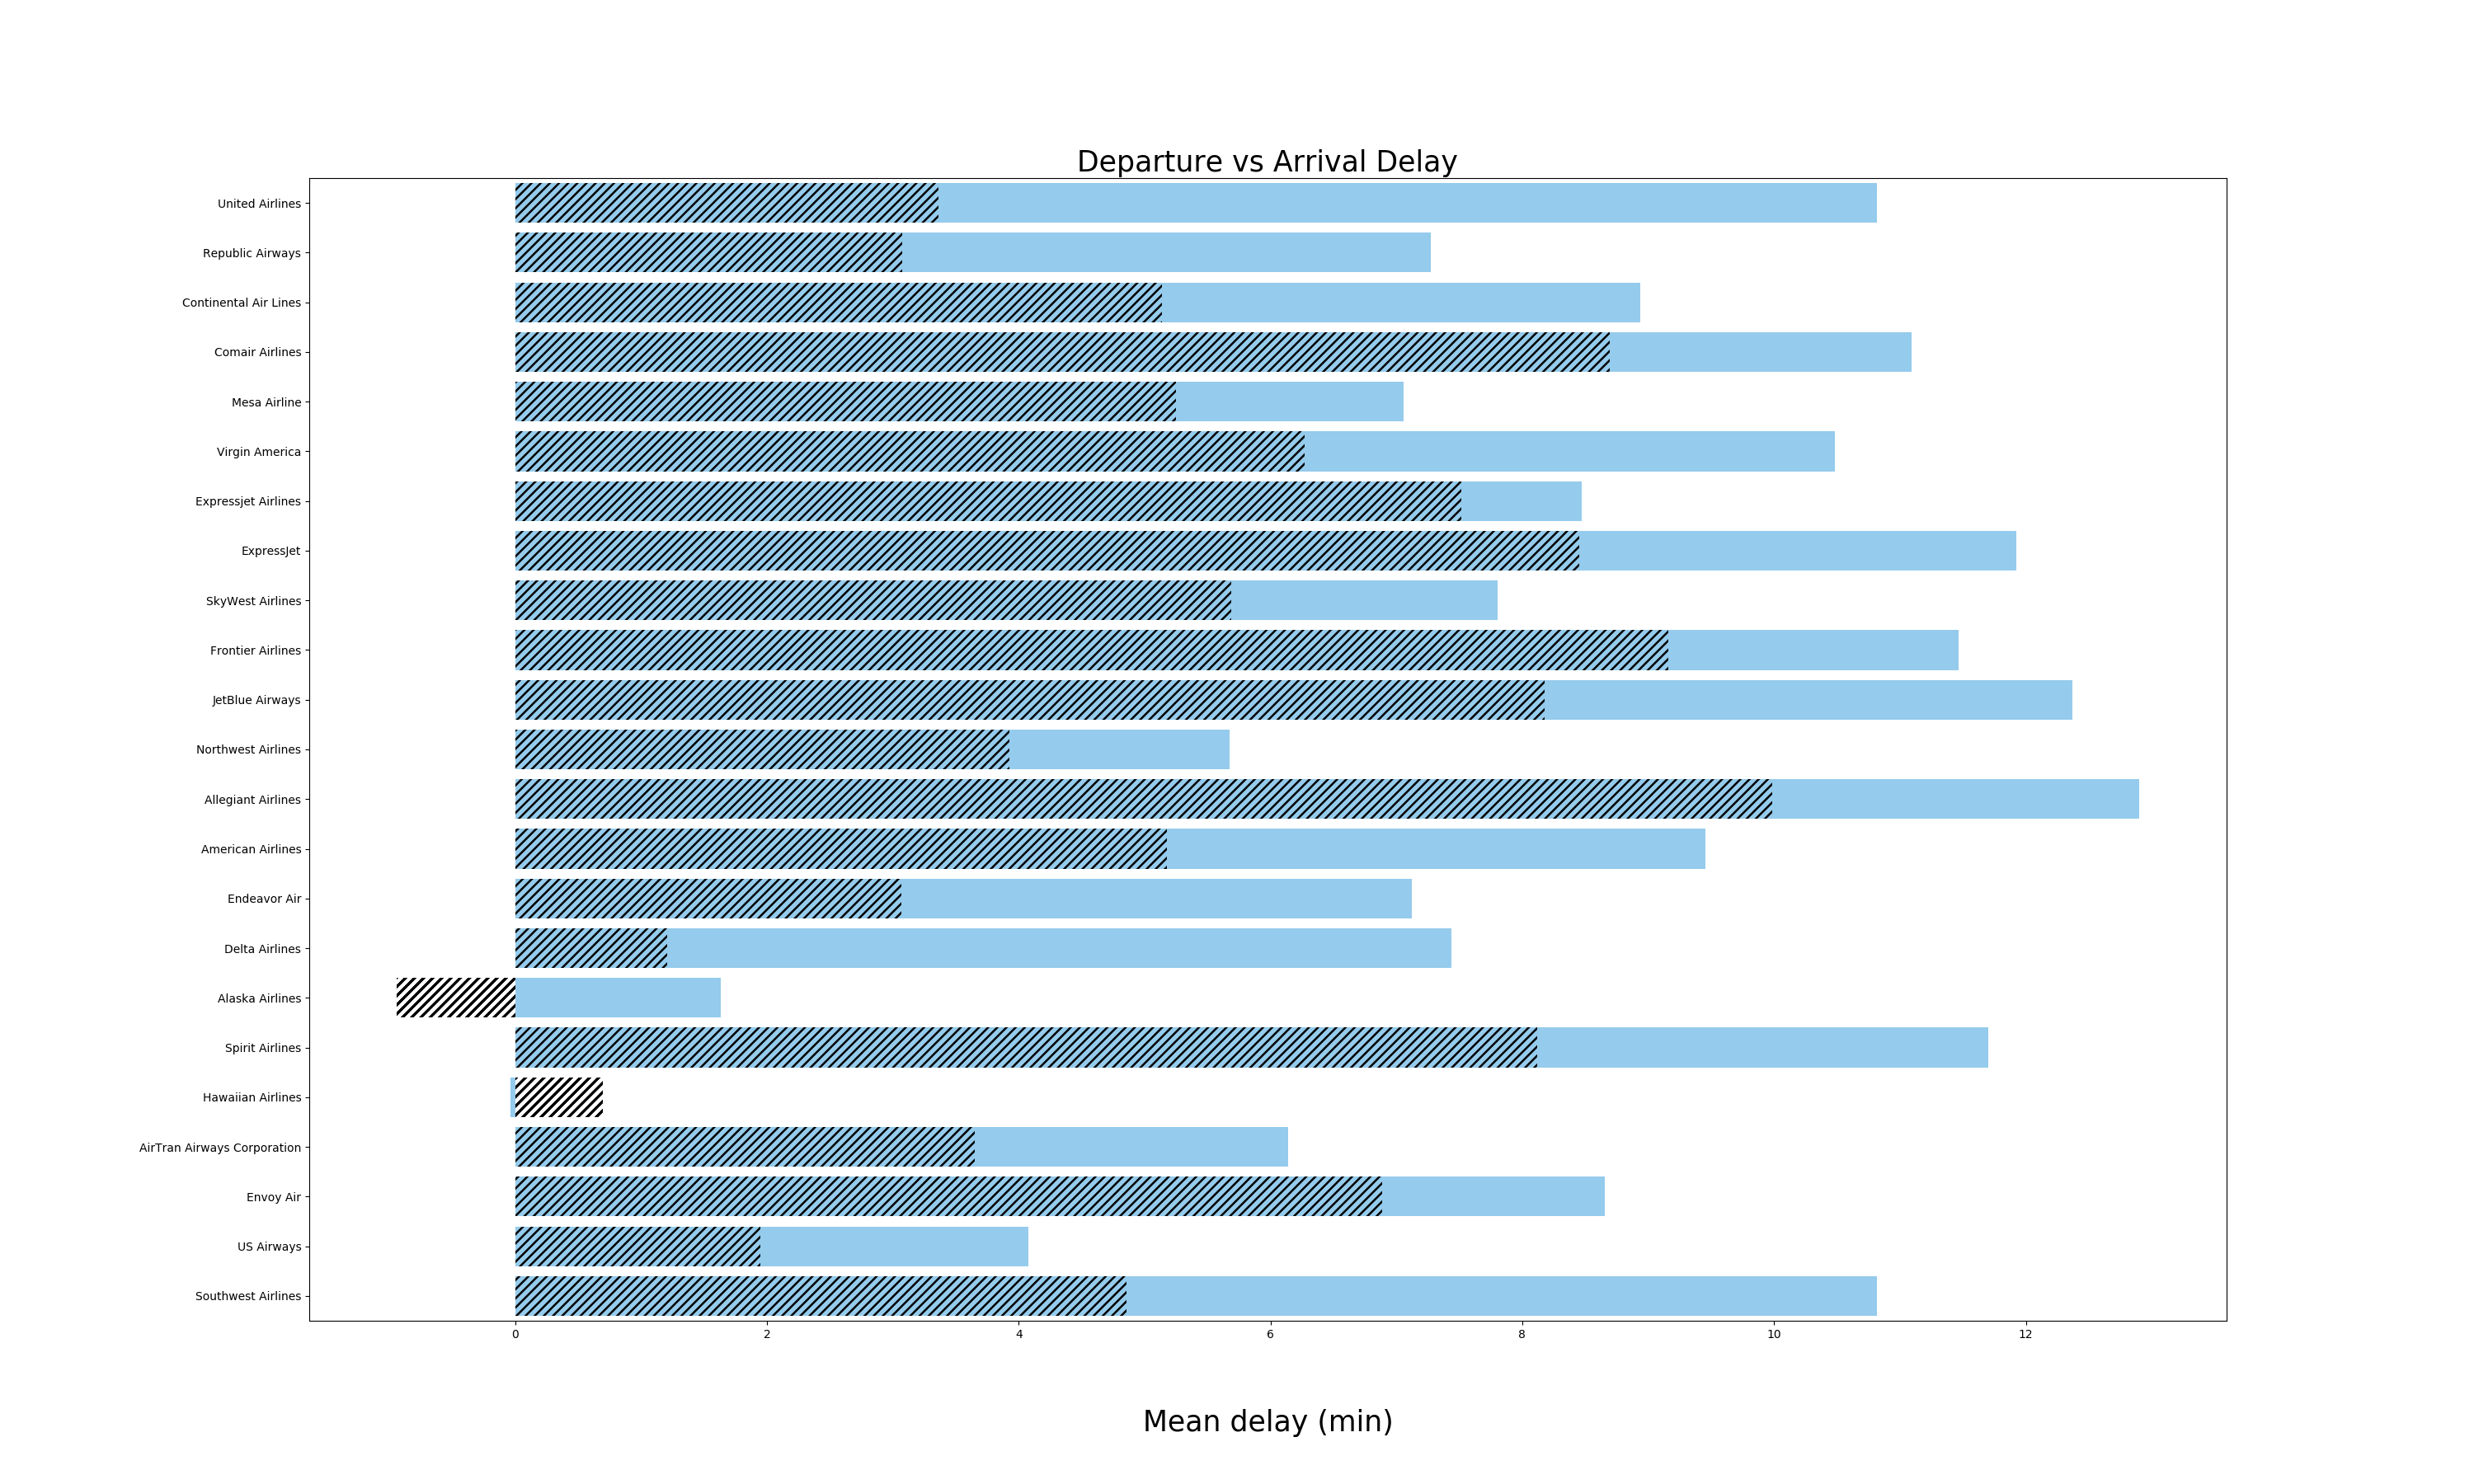

In [60]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8 

fig = plt.figure(1, figsize=(25,15))
ax = sns.barplot(x="avg(DEP_DELAY)", y="OP_CARRIER", data=dep_df, color="lightskyblue", ci=None)
ax = sns.barplot(x="avg(ARR_DELAY)", y="OP_CARRIER", data=arr_df, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay',fontsize=25)
plt.xlabel('Mean delay (min)', fontsize=25, labelpad=60);

%matplot plt

The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.

The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS, and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.

Another interesting information is related to Delta Airlines. The arrivals are negative. This means that even when they leave late, they are a good airline compensating by reducing the time of the flights to arrive on time or in average.

The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.

The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS, and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.

## AVG NUMBER OF TAKEOFF PER AIRPORT

In this plot we have calculated Avg. number of Takeoffs per Airports.

In [63]:
import pyspark.sql.functions as F 
airportAgg_DF = df.groupBy("ORIGIN").agg(F.sum("WHEELS_OFF")).orderBy(col("sum(WHEELS_OFF)").desc()).limit(25).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

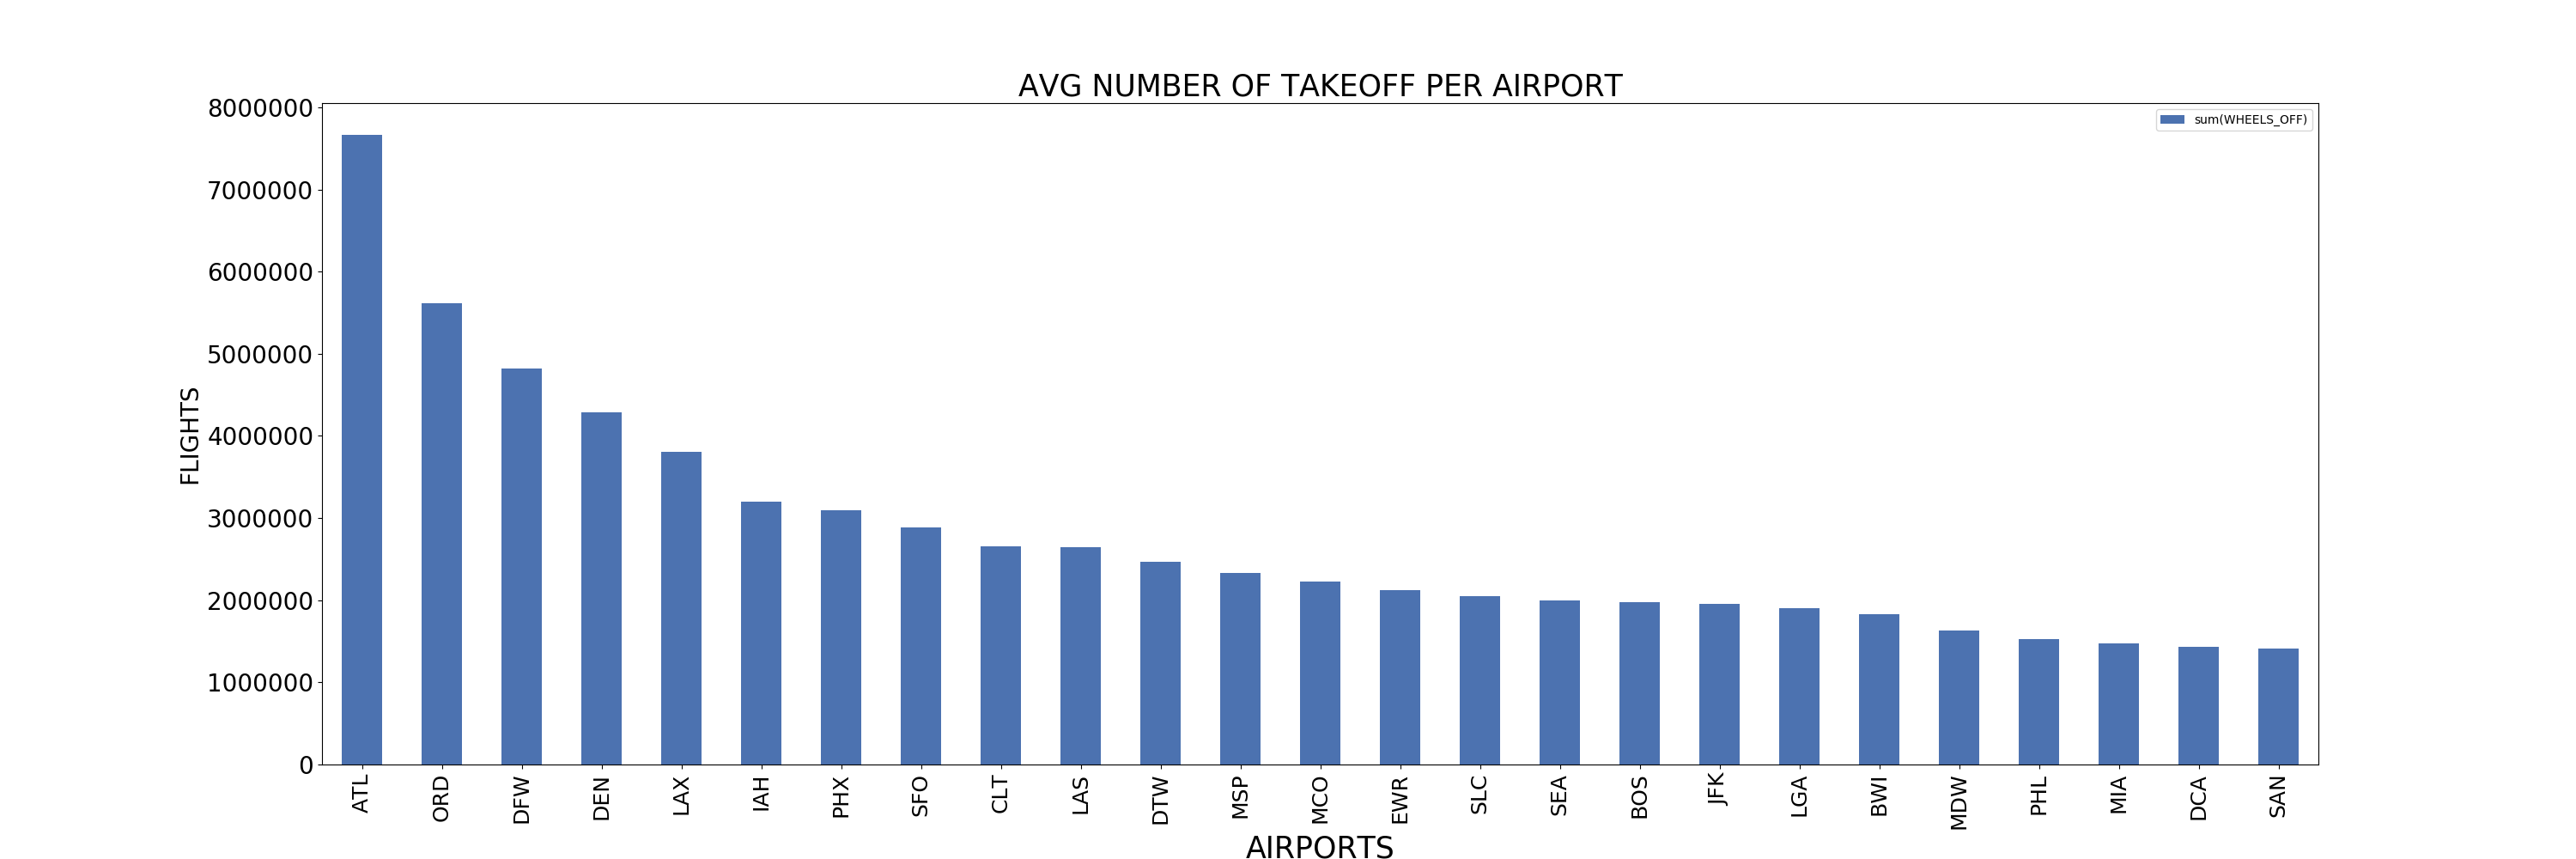

In [64]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
plt.style.use('seaborn-deep')
airportAgg_DF.plot.bar()
plt.title('AVG NUMBER OF TAKEOFF PER AIRPORT', fontsize=25)
plt.xlabel('AIRPORTS', fontsize=25)
plt.ylabel('FLIGHTS', fontsize=20)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=20)
xpos = np.arange(len(airportAgg_DF.ORIGIN))
plt.xticks(xpos,airportAgg_DF['ORIGIN'],rotation = 90)
plt.show();
%matplot plt

This will gives us better idea about Airpots takeoff figures and their counts.

# The Most Common Airports/Most Crowded Airports.

**The USA's busiest airports by aircraft movements are measured by total movements.A movement is a WheelsOn or Wheelsoff of an aircraft.**
This will gives the idea about which airports are usually busy with flights and mostly used.

In [68]:
df_f=df.select("OP_CARRIER","DEST","ORIGIN")\
        .groupBy('DEST').count()\
        .orderBy('count', ascending=False)\
        .limit(20)
        

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [69]:
df_fp=df_f.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

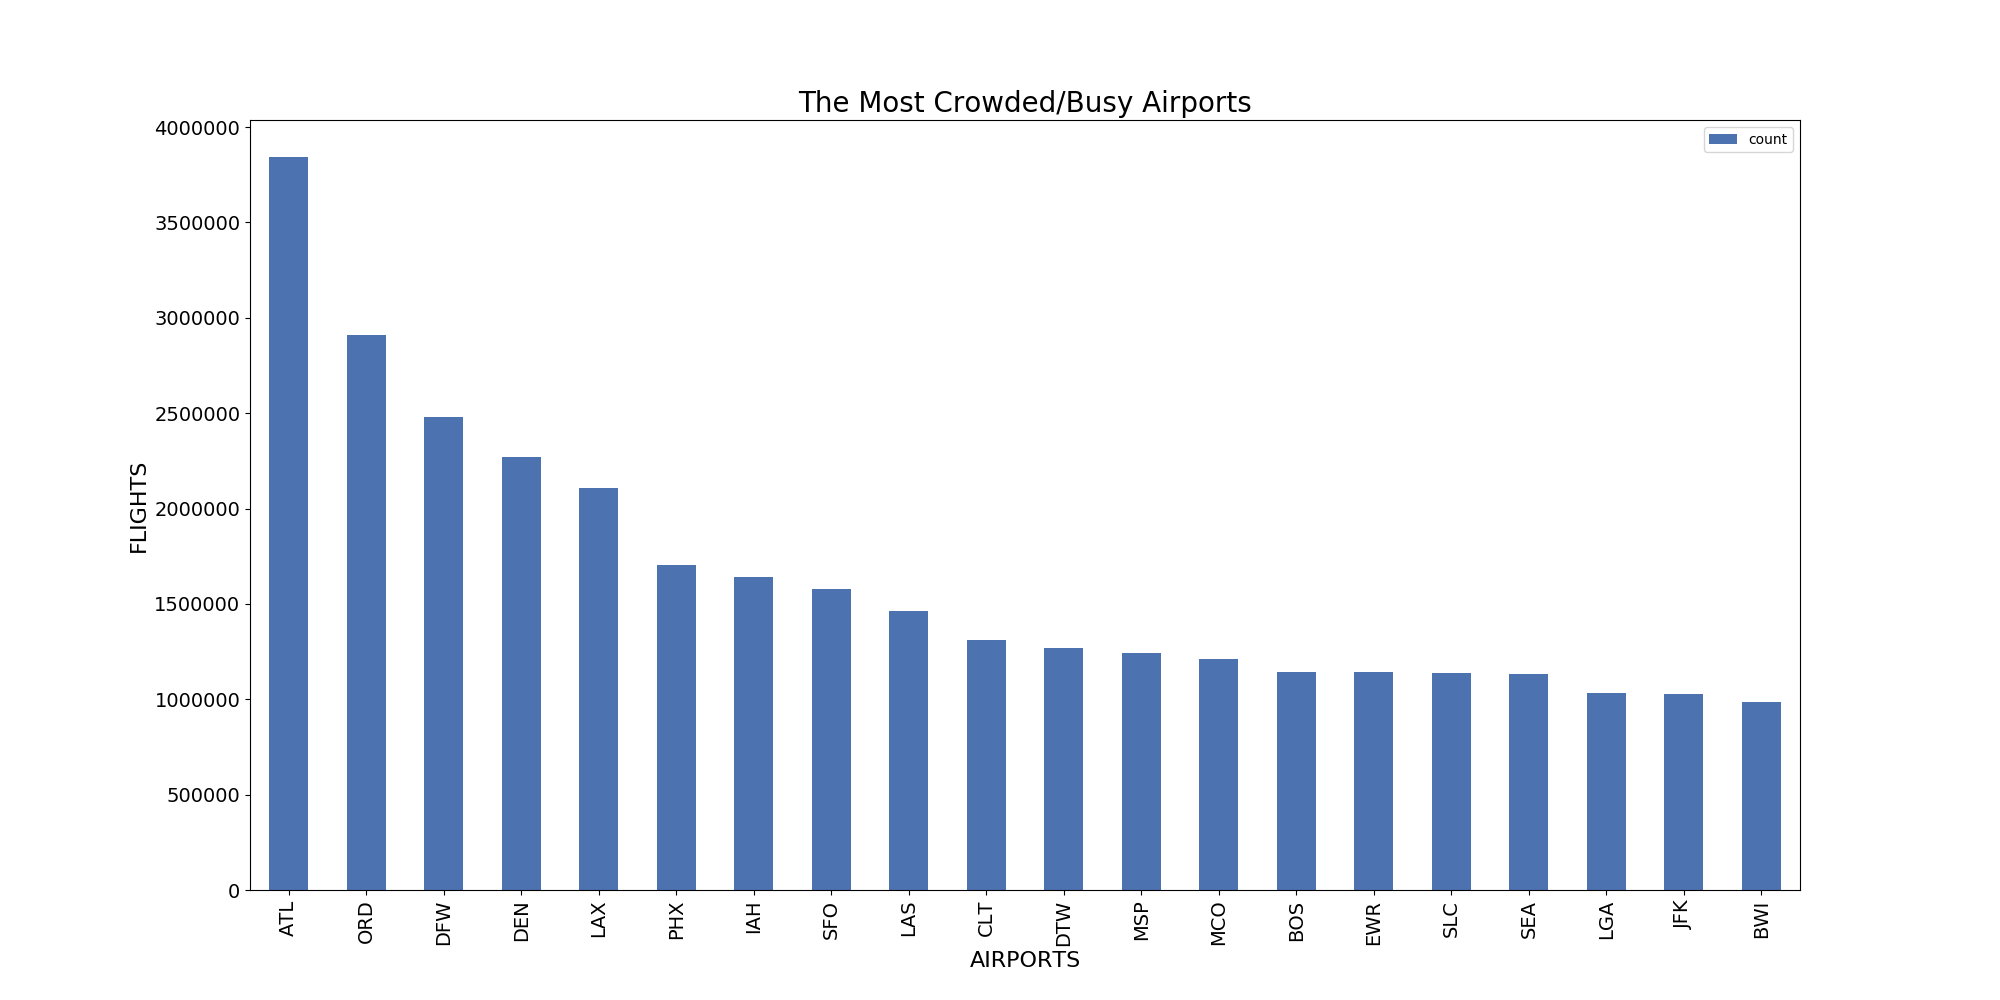

In [72]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]
df_fp.plot.bar()
plt.title('The Most Crowded/Busy Airports', fontsize=20)
plt.xlabel('AIRPORTS', fontsize=16)
plt.ylabel('FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
import numpy as np
xpos = np.arange(len(df_fp.DEST))
plt.xticks(xpos,df_fp['DEST'],rotation = 90)
plt.show();
%matplot plt

## 30 Most Common Destination (Cities)

In [73]:
dest_df=df.groupBy('DEST').count().orderBy(col("count").desc()).limit(30)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [74]:
dest_df=dest_df.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

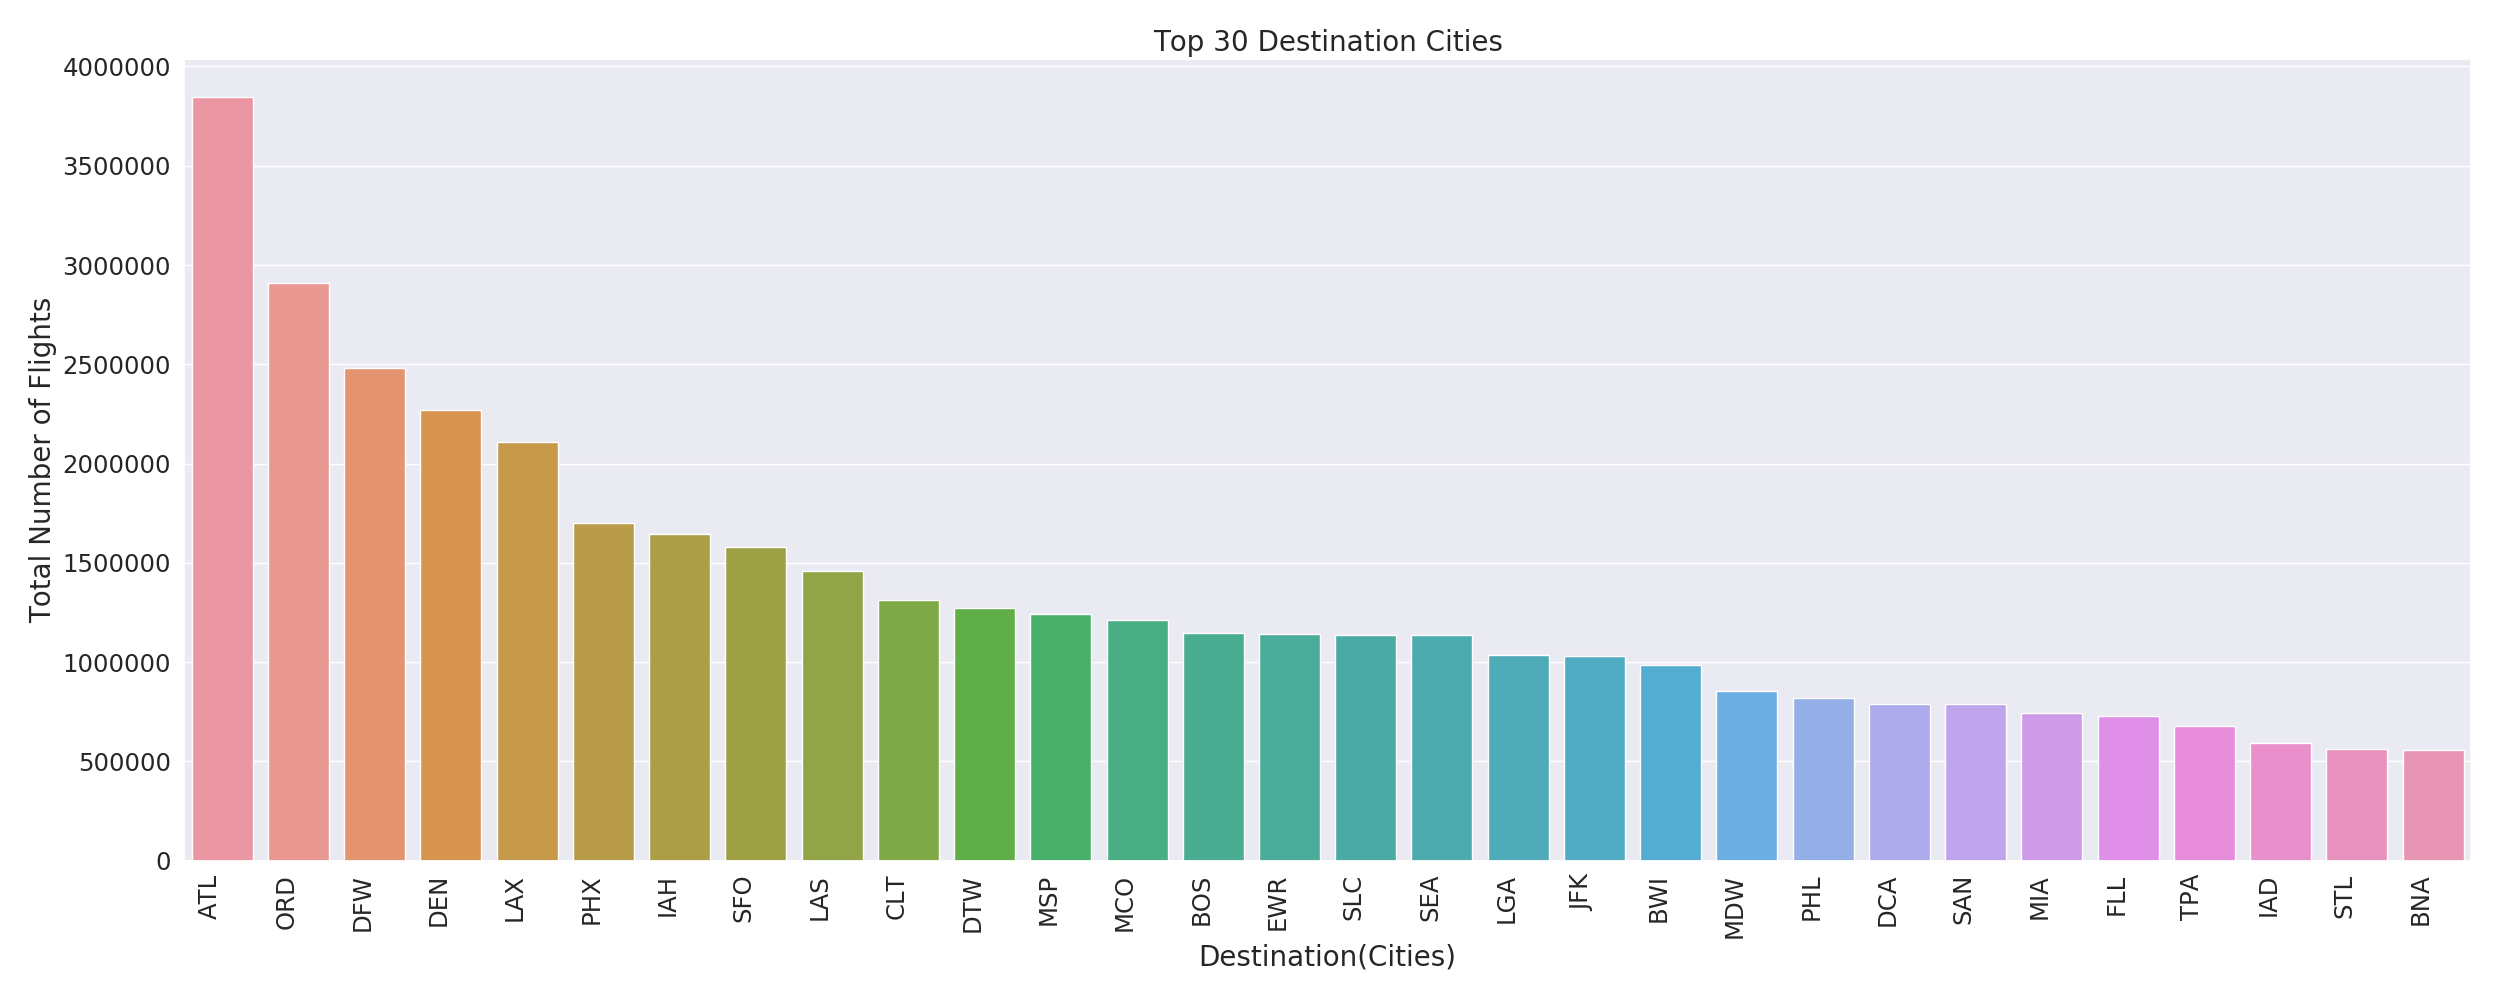

In [79]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=1.6)
axis = sns.barplot(x=dest_df['DEST'],y=dest_df['count'], data=dest_df)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('Destination(Cities)', fontsize=20)
plt.ylabel('Total Number of Flights', fontsize=20)
plt.rc('ytick',labelsize=12)
plt.tight_layout()
plt.show();

%matplot plt

# No of destination by Airline(selected Airline shown in orange colour)

In [80]:
cities=df.groupBy("OP_CARRIER","DEST").count()
cities_1=cities.select("OP_CARRIER").toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [81]:
cities_airline = cities_1.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='NUMBER_CITIES')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

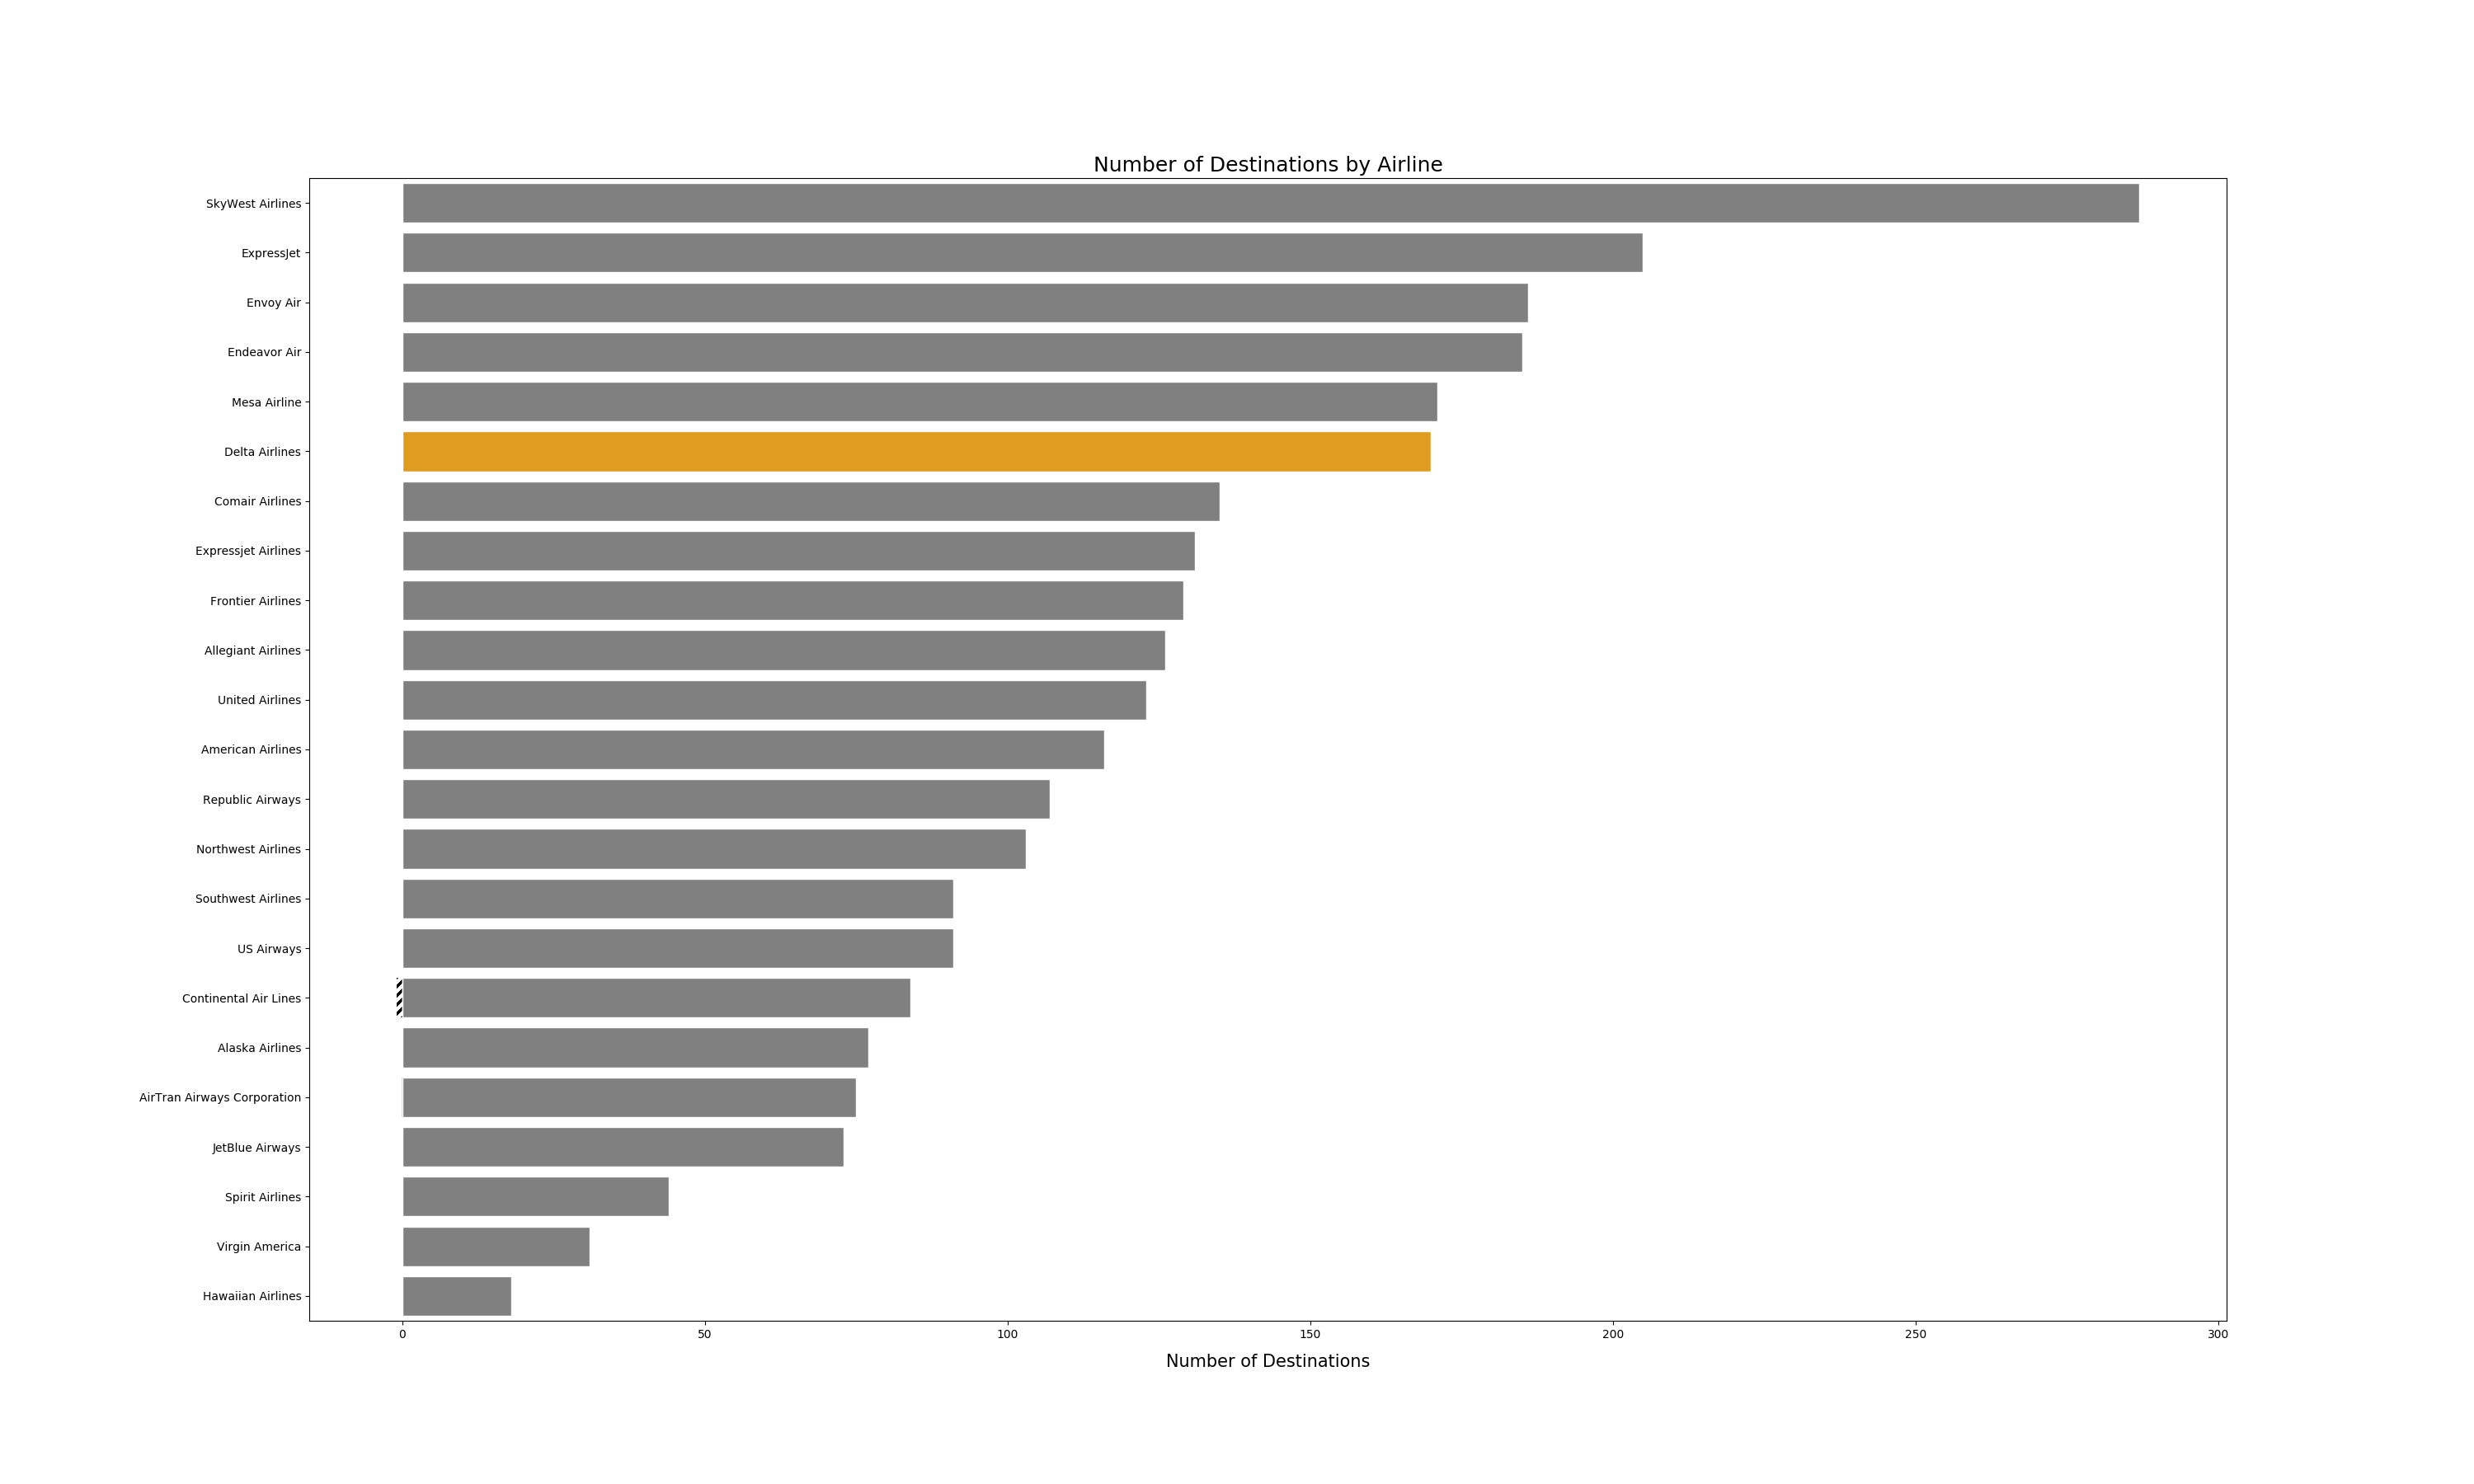

In [84]:
sns.set_style('darkgrid')
fig = plt.figure(1, figsize=(25,15))
ax = sns.barplot(x="NUMBER_CITIES", y="OP_CARRIER", data=cities_airline, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=15, labelpad=12);
plt.show();

%matplot plt

# Difference between arrival and departure delay.

In [85]:
df=df.withColumn('ARR-DEP_DELAY', col("ARR_DELAY")-col("DEP_DELAY"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [87]:
arr_dep_df = df.groupBy('OP_CARRIER').agg(F.sum("ARR-DEP_DELAY")).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

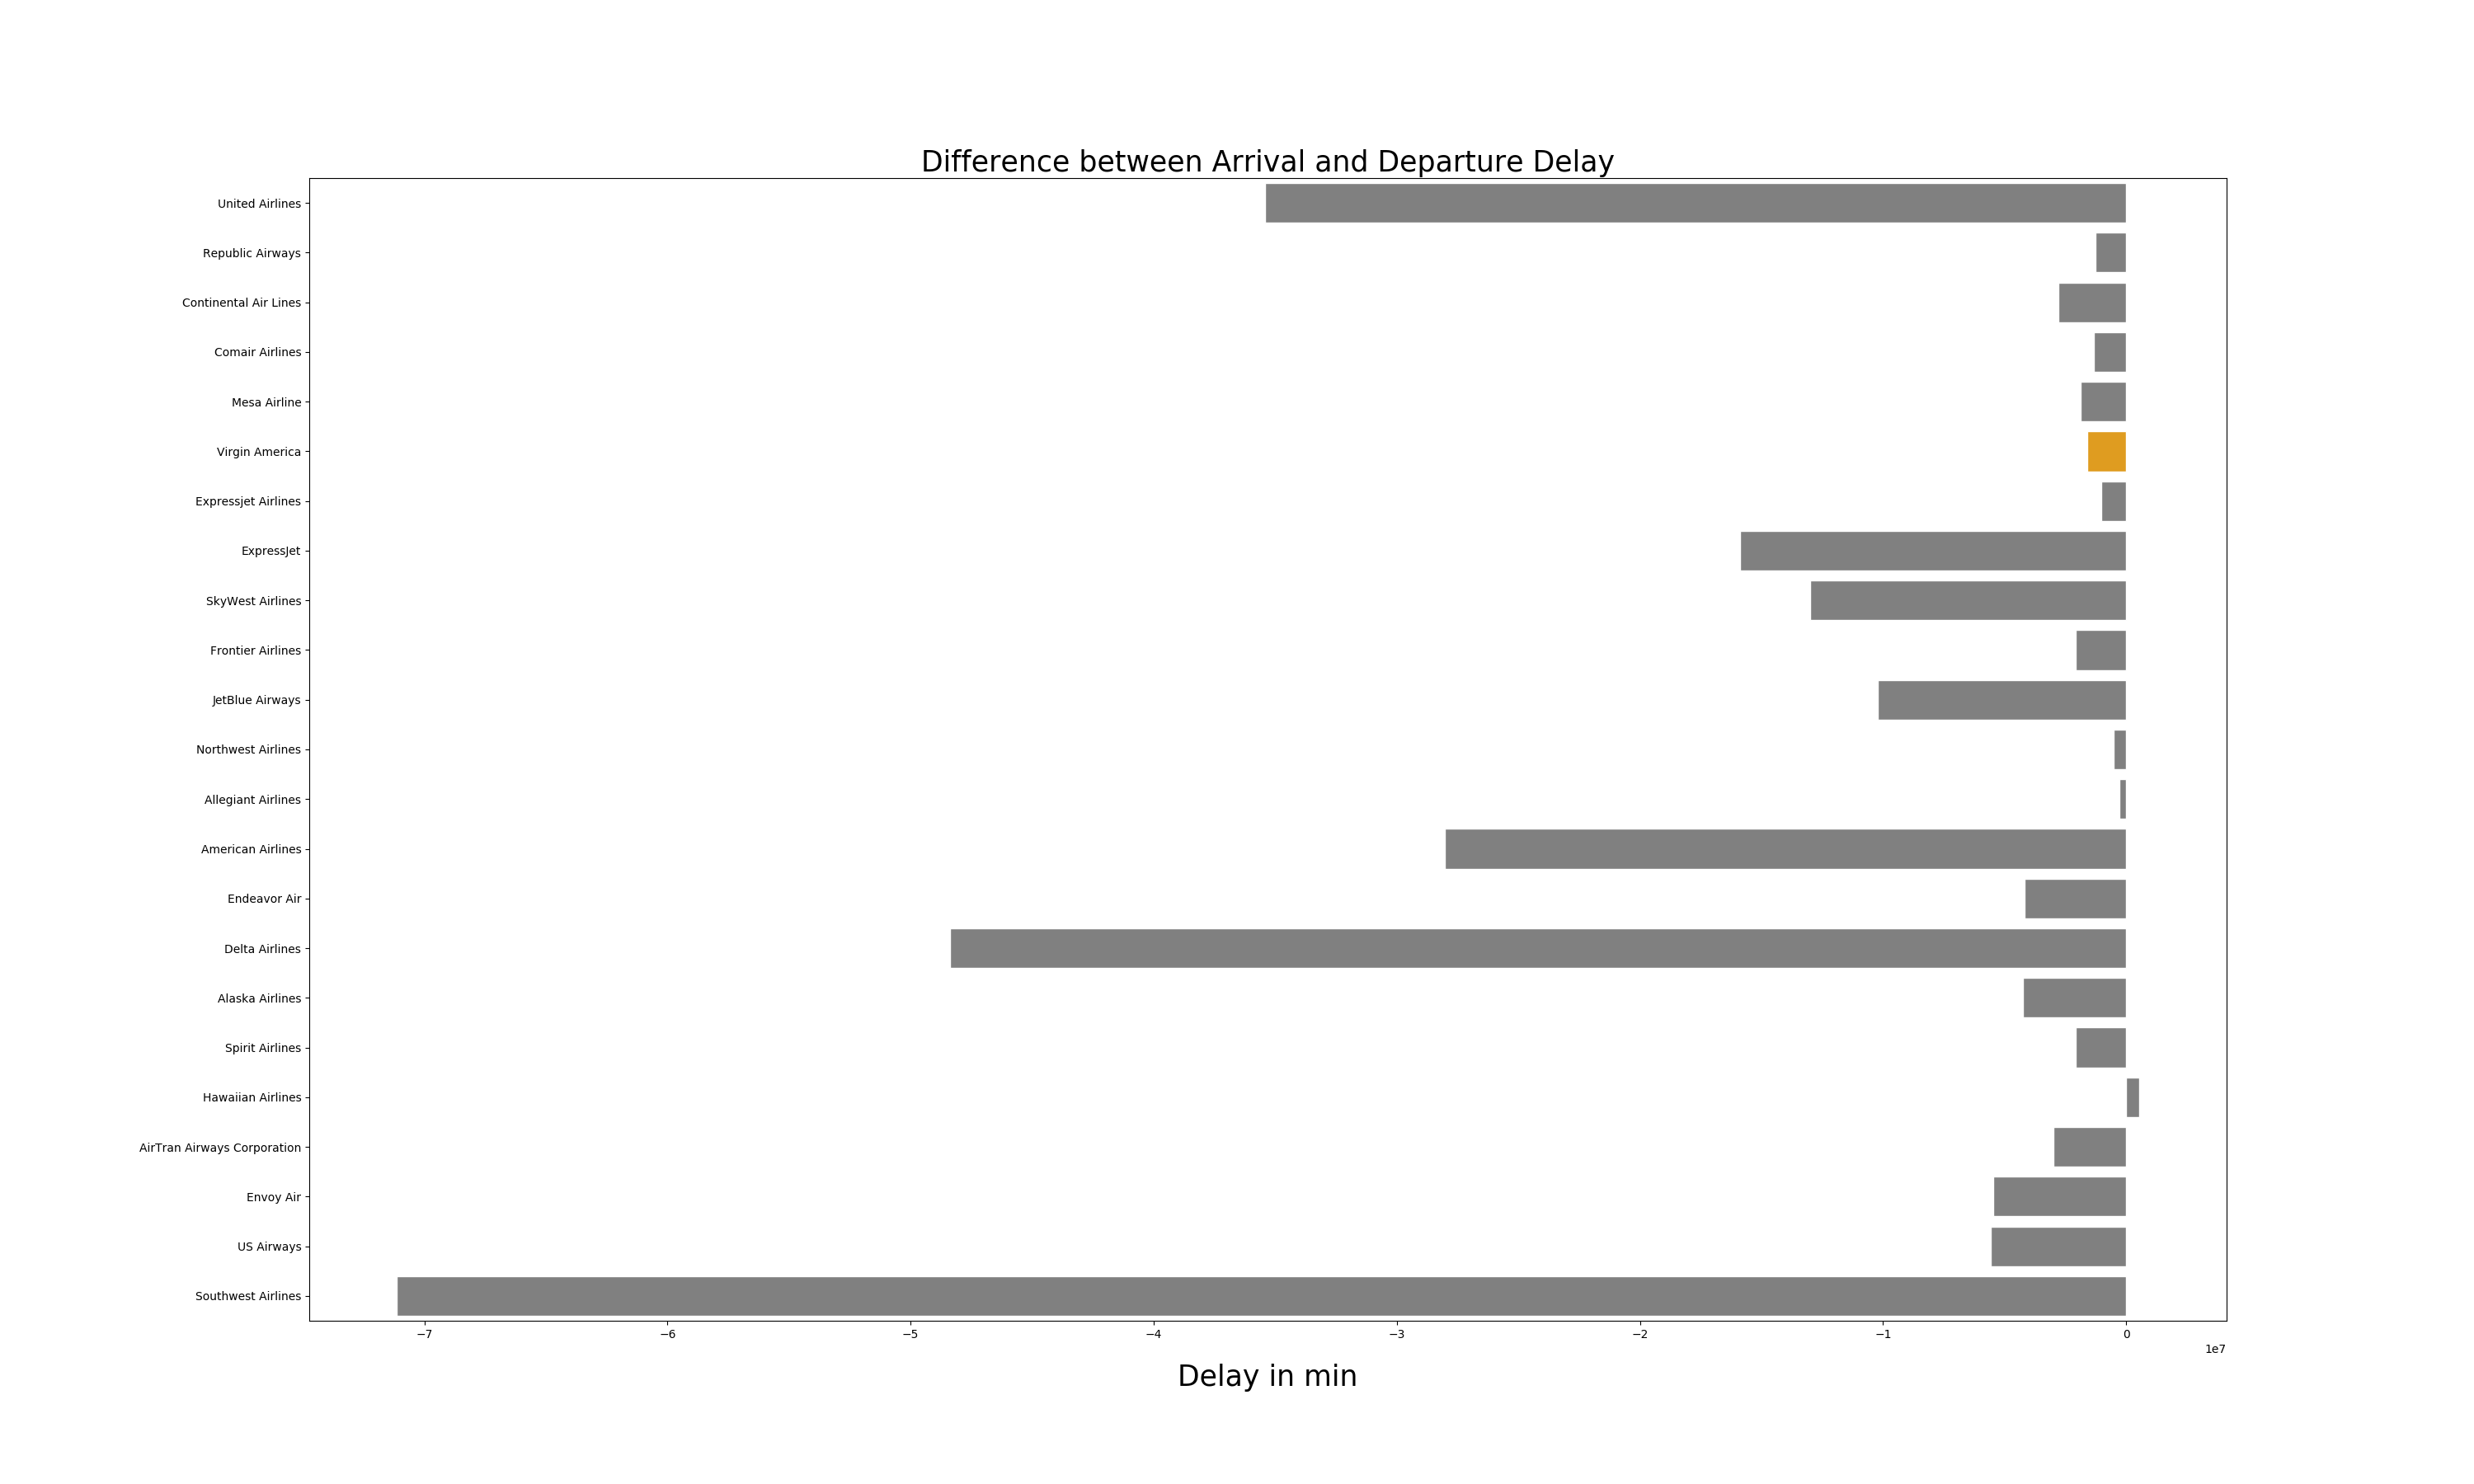

In [90]:
sns.set_style('darkgrid')
fig = plt.figure(1, figsize=(25,15))
ax = sns.barplot(x="sum(ARR-DEP_DELAY)", y="OP_CARRIER", data=arr_dep_df, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Difference between Arrival and Departure Delay', fontsize=25)
plt.xlabel('Delay in min', fontsize=25, labelpad=20);
plt.show();
%matplot plt

In [ ]:
ahead_of_time =df.select('OP_CARRIER',"ORIGIN","DEST","DEP_DELAY").dropna().filter(df.DEP_DELAY<0).toPandas()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Number of Flights Delay by Time Period

## Best and Worst month to travel based on Flight Delays.

In [177]:
WorstMonths= df0.groupBy('MONTH').agg(F.sum("FLIGHT_STATUS")).orderBy(col("sum(FLIGHT_STATUS)").desc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

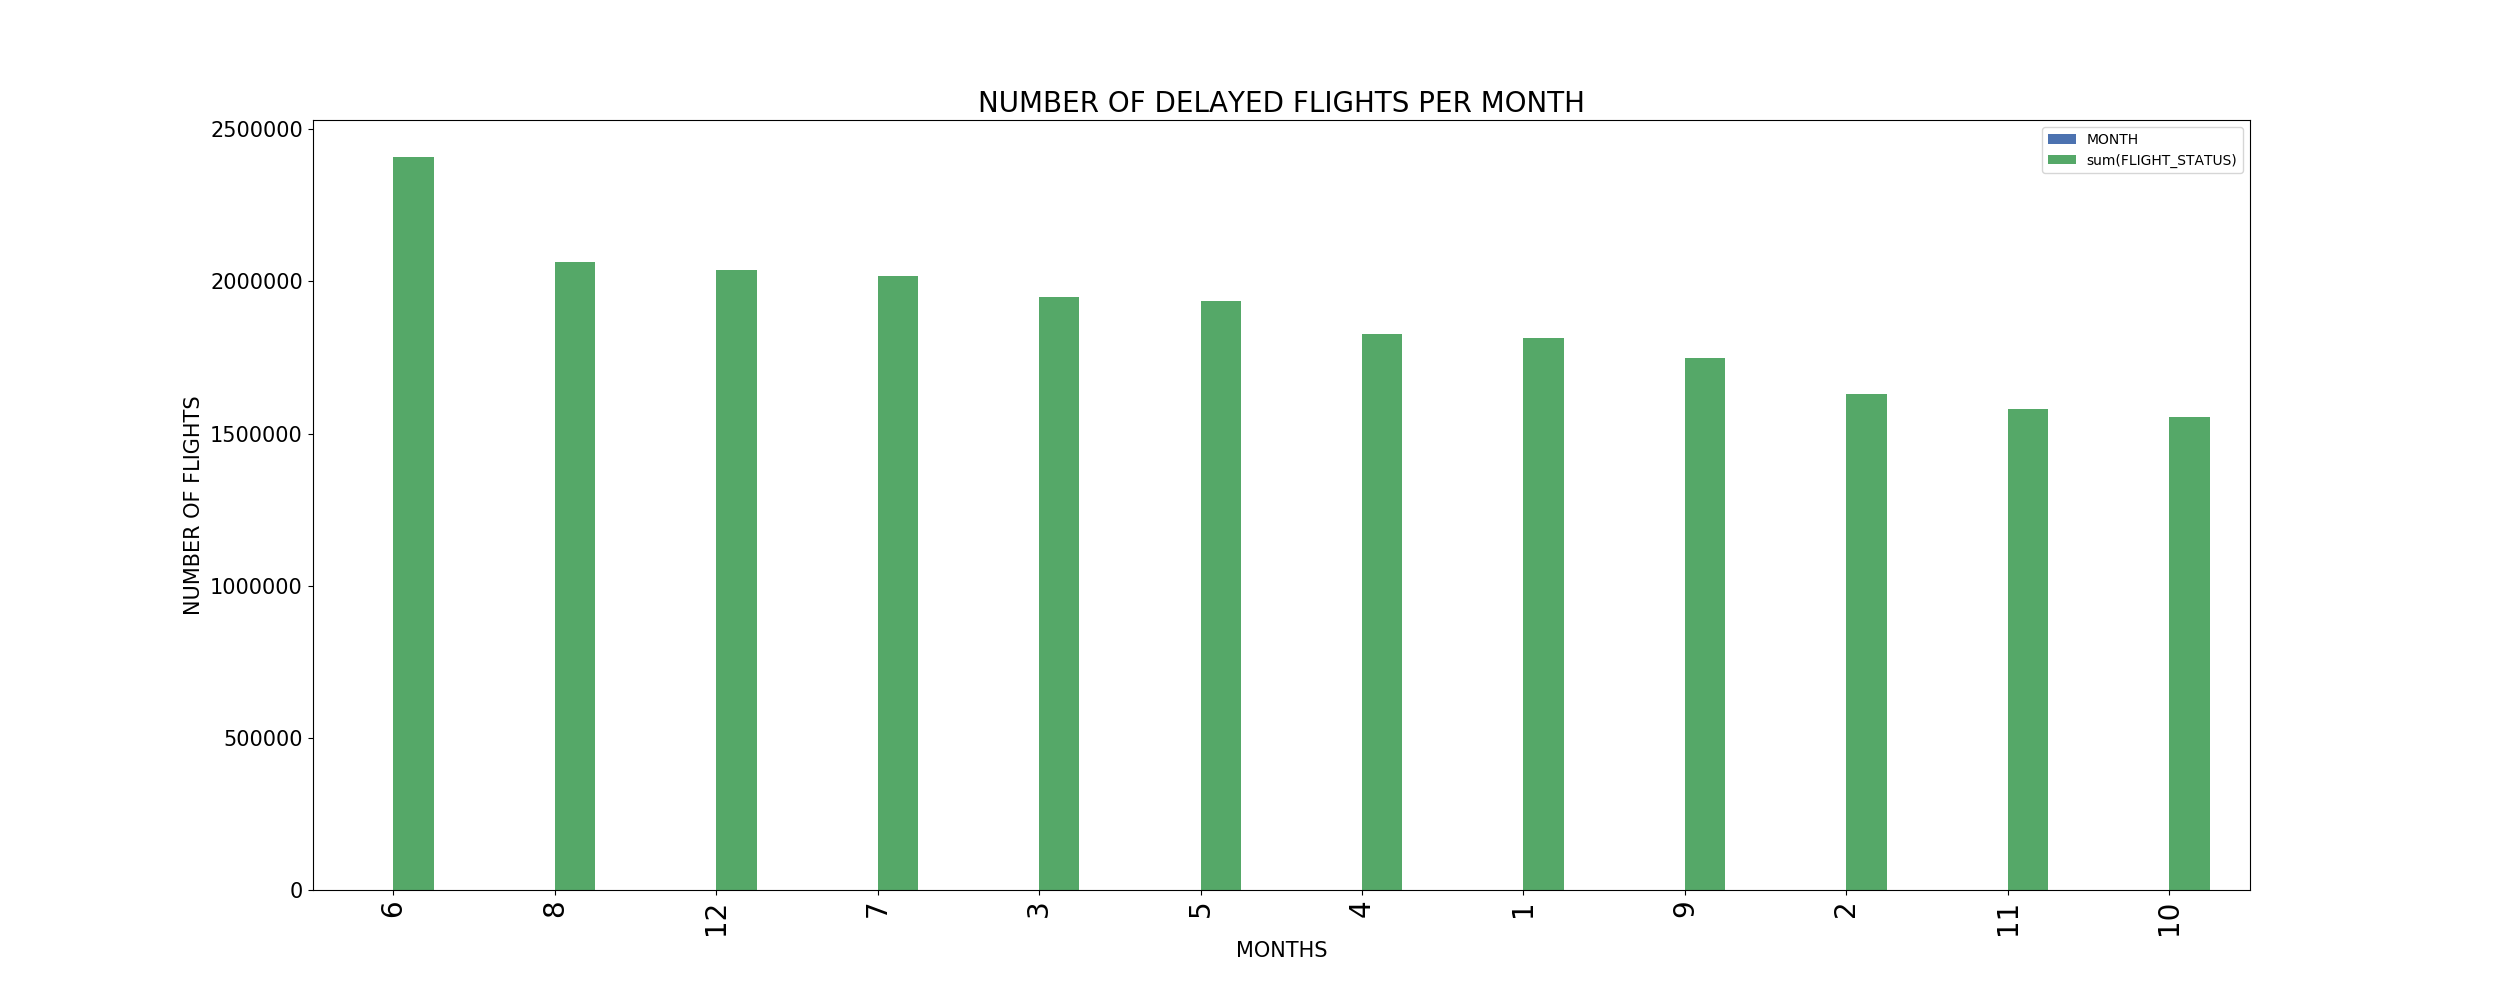

In [178]:
#Best n Worst month to travel.
plt.figure(figsize=(15,50))
xpos = np.arange(len(WorstMonths.MONTH))
WorstMonths.plot.bar()
plt.title('NUMBER OF DELAYED FLIGHTS PER MONTH', fontsize=20)
plt.xlabel('MONTHS', fontsize=15)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=15)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=10)
plt.xticks(xpos,WorstMonths['MONTH'],rotation = 90)
plt.show();
%matplot plt

According to this data the months with the most delayed flights are July, August, June and May, so basically the summer months. These are followed to November, December and October, which are the end of year including Christmas. The best months to travel are February, January and September, clearly after the standard holidays (summer and Christmas).

# Better Day to travel.

In [4]:
from pyspark.sql.functions import dayofmonth
dayDF = df.withColumn('DAY',dayofmonth(df.FL_DATE))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
import pyspark.sql.functions as F 
BestDay= dayDF.groupBy('DAY').agg(F.sum("FLIGHT_STATUS")).orderBy(col("sum(FLIGHT_STATUS)")).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

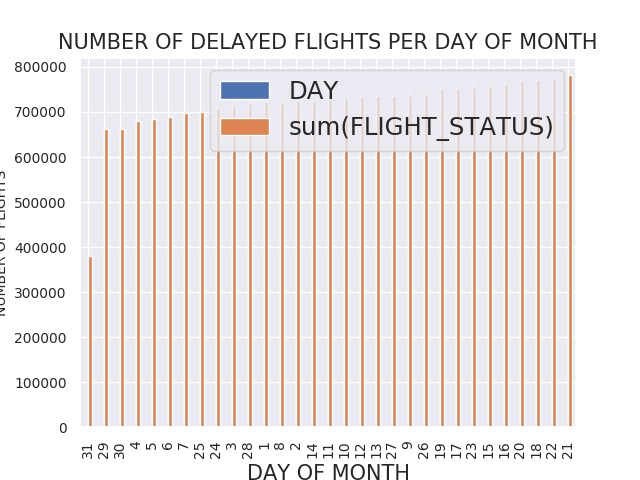

In [41]:
plt.figure(figsize=(15,60))
xpos = np.arange(len(BestDay.DAY))
BestDay.plot.bar()
plt.title('NUMBER OF DELAYED FLIGHTS PER DAY OF MONTH', fontsize=15)
plt.xlabel('DAY OF MONTH', fontsize=15)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=10)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.xticks(xpos,BestDay['DAY'],rotation = 90)
plt.show();
%matplot plt

%matplot plt

# Most Popular Destination with Average Arrival Delays

In [21]:
Avg_Arr_Delay_Dest= df.groupBy('DEST').agg(F.mean("ARR_DELAY")).orderBy(col("avg(ARR_DELAY)").desc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
Dest_Flights=df.groupBy('DEST').count().orderBy(col('count').desc()).limit(30).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
Merged_Df= pd.merge(Dest_Flights, Avg_Arr_Delay_Dest, on='DEST')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
Top_Avg_Arr_Delay_Dest=Merged_Df.drop('count',axis=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
Merged_Df = Merged_Df.set_index('DEST')
xpos = np.arange(len(Merged_Df.index))
fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

Dest_Flights.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
Top_Avg_Arr_Delay_Dest.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)
plt.xticks(xpos,Merged_Df.index,rotation = 90)
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<string>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

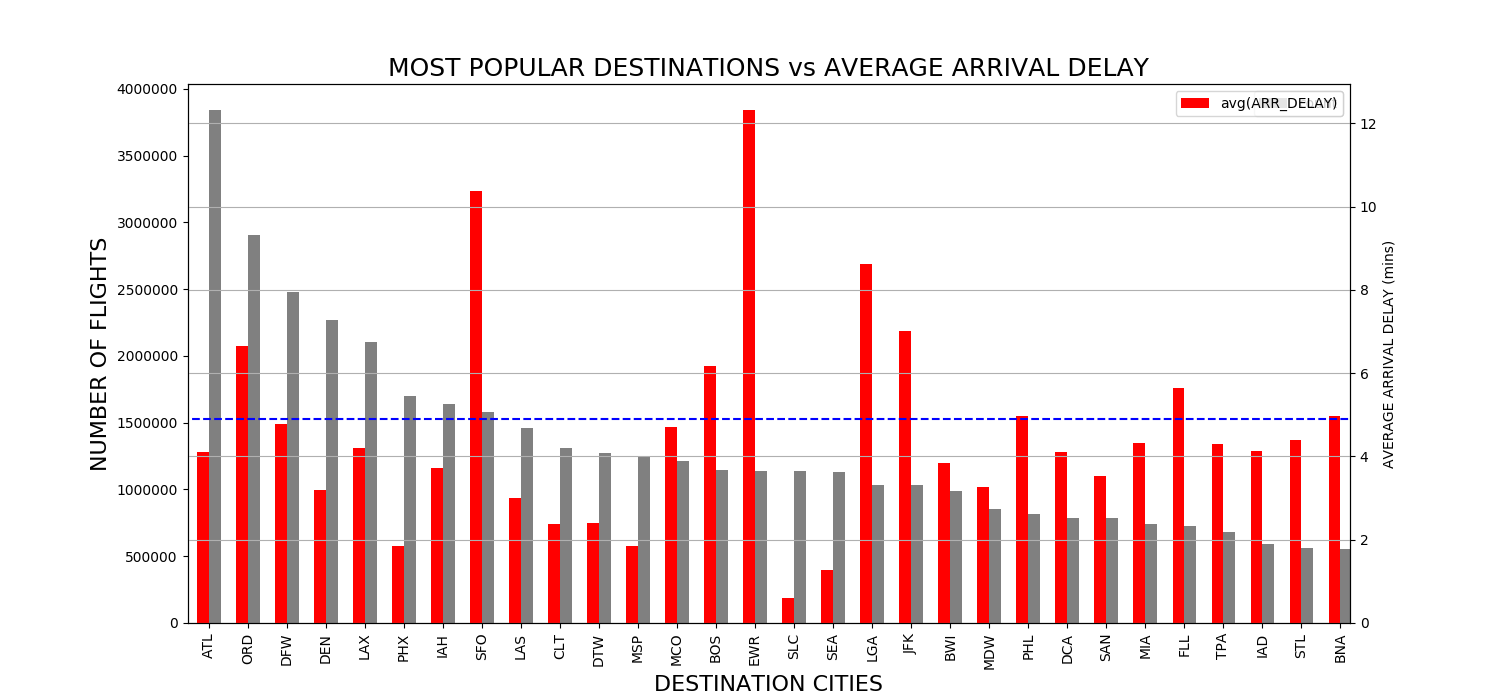

In [26]:
%matplot plt

In [27]:
Avg_Dep_Delay_Origin= df.groupBy('ORIGIN').agg(F.mean("DEP_DELAY")).orderBy(col("avg(DEP_DELAY)").desc()).toPandas()
Origin_Flights=df.groupBy('ORIGIN').count().orderBy(col('count').desc()).limit(30).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
Merged_Df2= pd.merge(Origin_Flights, Avg_Dep_Delay_Origin, on='ORIGIN')
Top_Avg_Dep_Delay_Origin=Merged_Df2.drop('count',axis=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

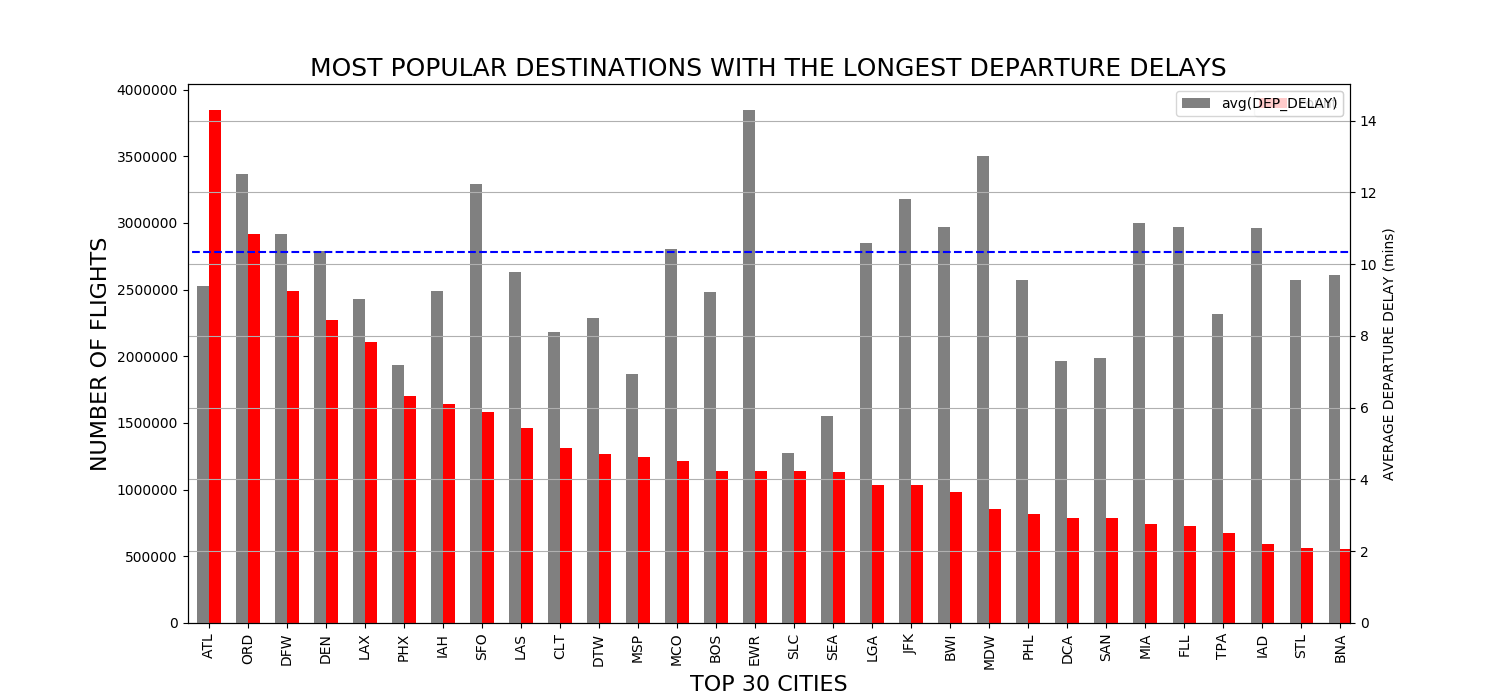

In [29]:
Merged_Df2 = Merged_Df2.set_index('ORIGIN')
xpos = np.arange(len(Merged_Df2.index))
fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

Origin_Flights.plot(kind='bar',color='red',ax=ax, width=width, position=0)
Top_Avg_Dep_Delay_Origin.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.xticks(xpos,Merged_Df2.index,rotation = 90)
plt.show()

%matplot plt


# Histogram for distance

In [ ]:
df.describe(['YEAR']).show()

In [30]:
df_09=df.select("DISTANCE").where(col("YEAR")==2009).toPandas()
df_10=df.select("DISTANCE").where(col("YEAR")==2010).toPandas()
df_11=df.select("DISTANCE").where(col("YEAR")==2011).toPandas()
df_12=df.select("DISTANCE").where(col("YEAR")==2012).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

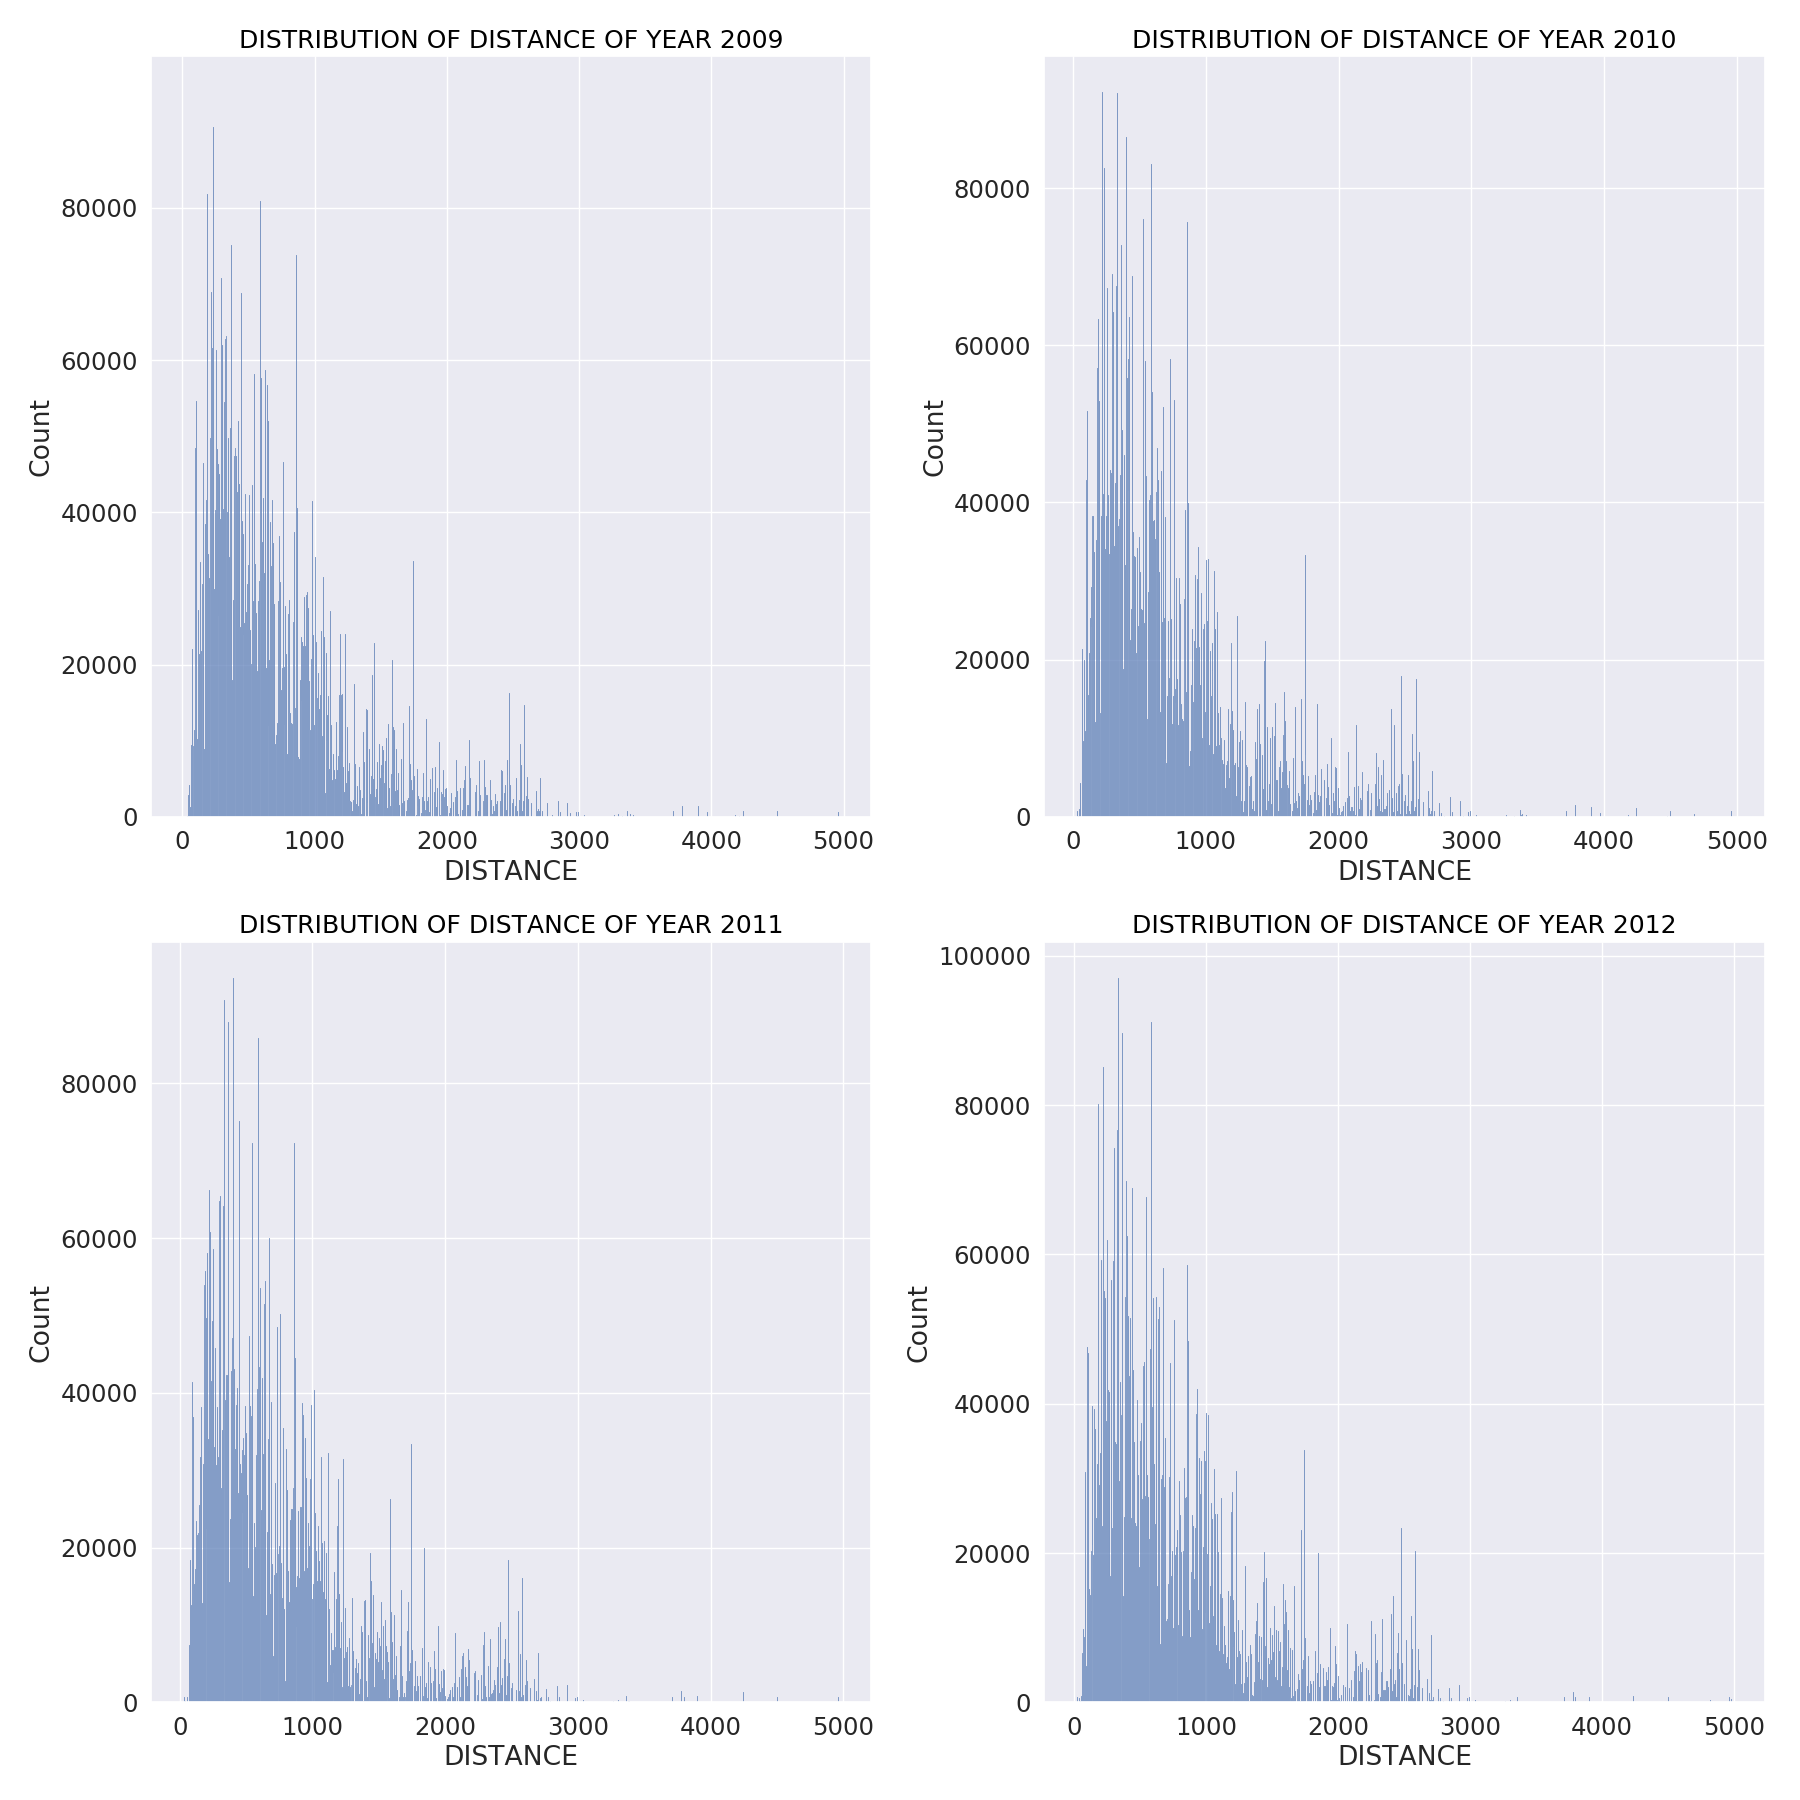

In [31]:
fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(221) # instead of plt.subplot(5, 2, 1)
sub1.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2009', fontsize=18, color="black")
sub1 = sns.histplot(data=df_09,x="DISTANCE")

sub2 = fig.add_subplot(222)
sub2.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2010', fontsize=18, color="black")
sub2 = sns.histplot(data=df_10,x="DISTANCE")

sub3 = fig.add_subplot(223)
sub3.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2011', fontsize=18, color="black")
sub3 = sns.histplot(data=df_11,x="DISTANCE")

sub4 = fig.add_subplot(224)
sub4.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2012', fontsize=18, color="black")
sub4 = sns.histplot(data=df_12,x="DISTANCE")

fig.tight_layout()

plt.show();
%matplot plt

In [35]:
dfA_09=df.select("AIR_TIME").where(col("YEAR")==2009).toPandas()
dfA_10=df.select("AIR_TIME").where(col("YEAR")==2010).toPandas()
dfA_11=df.select("AIR_TIME").where(col("YEAR")==2011).toPandas()
dfA_12=df.select("AIR_TIME").where(col("YEAR")==2012).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

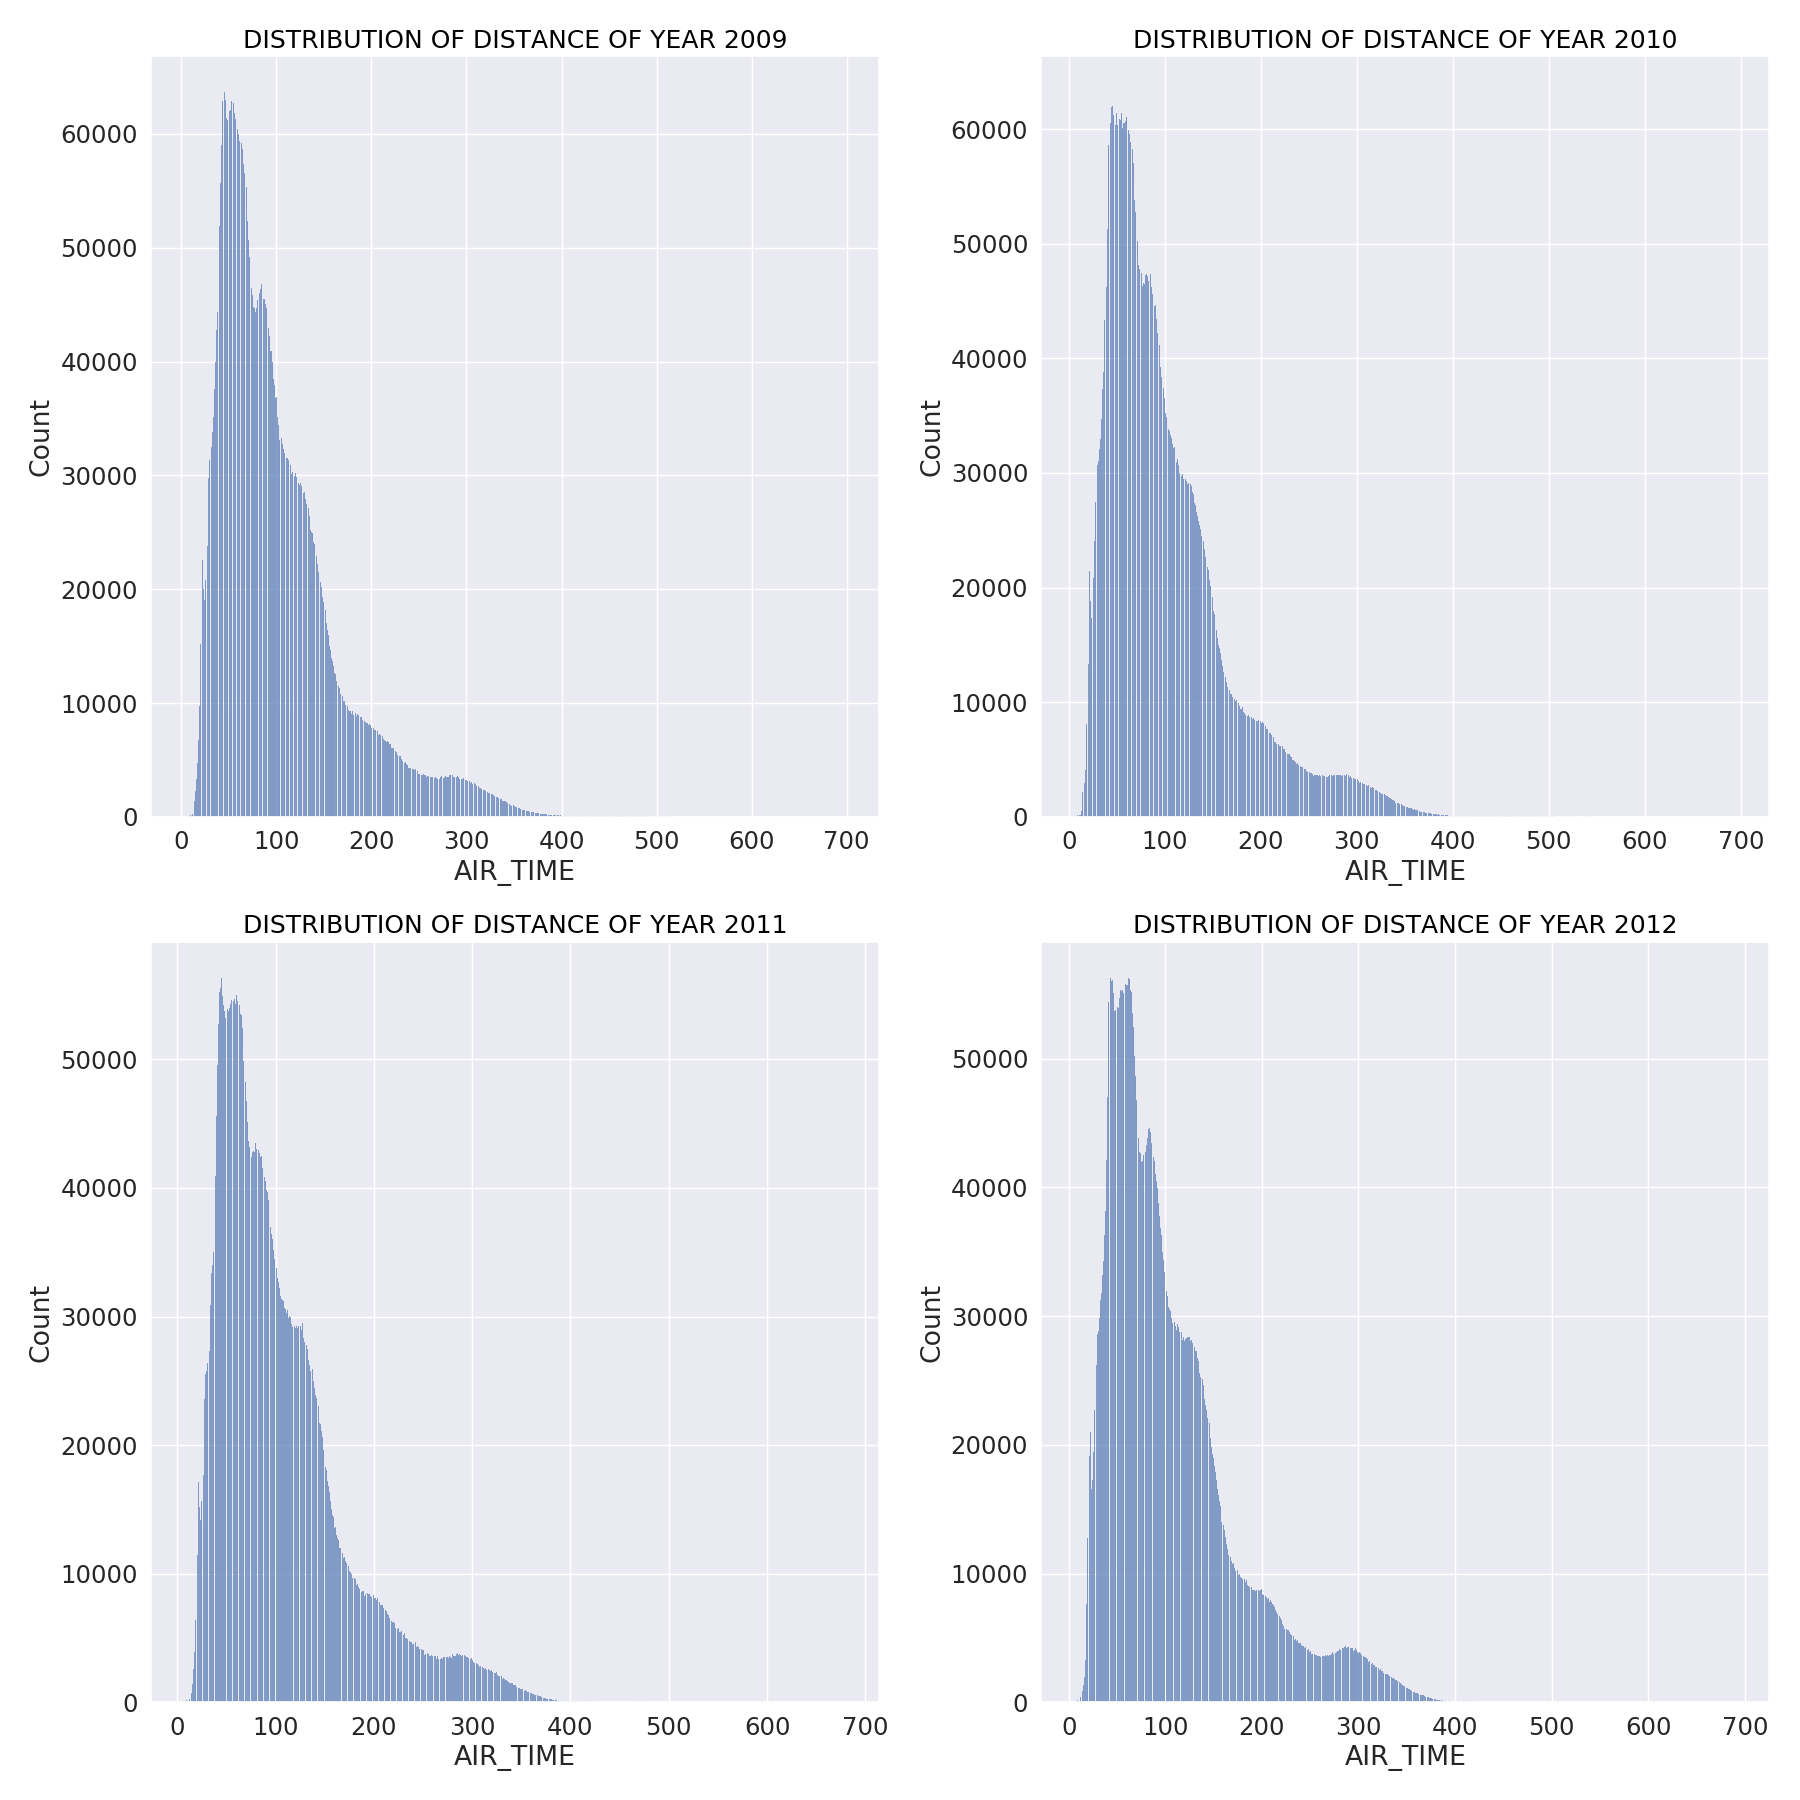

In [37]:
fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(221) # instead of plt.subplot(5, 2, 1)
sub1.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2009', fontsize=18, color="black")
sub1 = sns.histplot(data=dfA_09,x="AIR_TIME")

sub2 = fig.add_subplot(222)
sub2.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2010', fontsize=18, color="black")
sub2 = sns.histplot(data=dfA_10,x="AIR_TIME")

sub3 = fig.add_subplot(223)
sub3.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2011', fontsize=18, color="black")
sub3 = sns.histplot(data=dfA_11,x="AIR_TIME")

sub4 = fig.add_subplot(224)
sub4.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2012', fontsize=18, color="black")
sub4 = sns.histplot(data=dfA_12,x="AIR_TIME")

fig.tight_layout()

plt.show();
%matplot plt

In [32]:
dfE_09=df.select("CRS_ELAPSED_TIME").where(col("YEAR")==2009).toPandas()
dfE_10=df.select("CRS_ELAPSED_TIME").where(col("YEAR")==2010).toPandas()
dfE_11=df.select("CRS_ELAPSED_TIME").where(col("YEAR")==2011).toPandas()
dfE_12=df.select("CRS_ELAPSED_TIME").where(col("YEAR")==2012).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

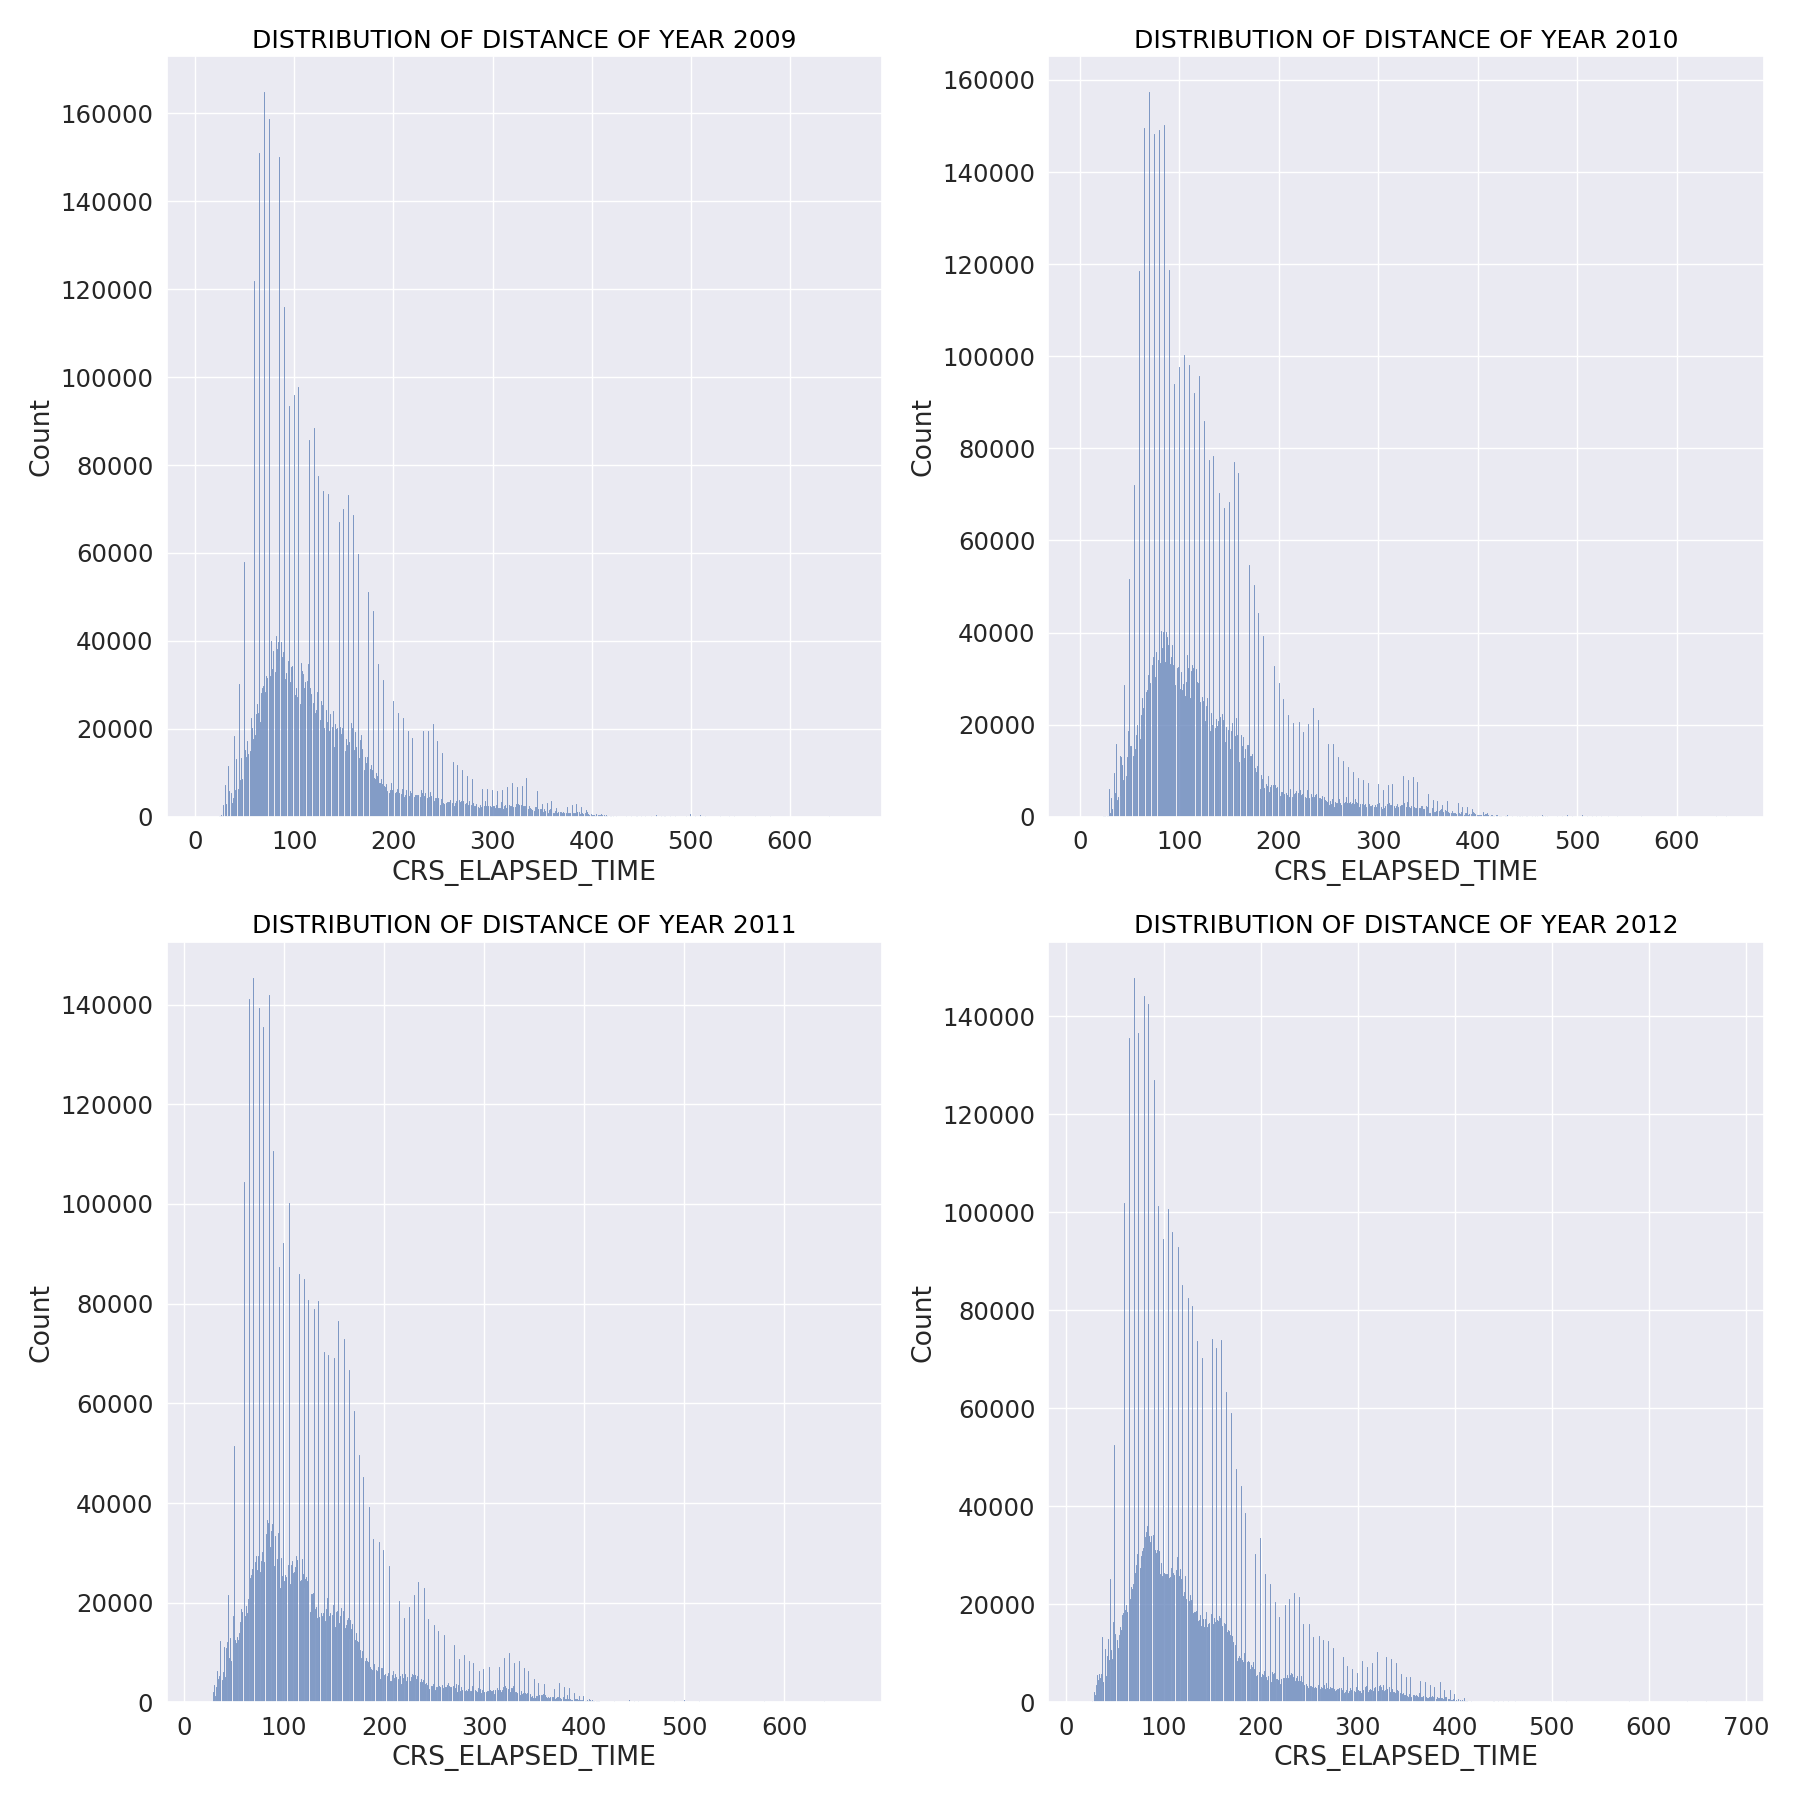

In [38]:
fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(221) # instead of plt.subplot(5, 2, 1)
sub1.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2009', fontsize=18, color="black")
sub1 = sns.histplot(data=dfE_09,x="CRS_ELAPSED_TIME")

sub2 = fig.add_subplot(222)
sub2.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2010', fontsize=18, color="black")
sub2 = sns.histplot(data=dfE_10,x="CRS_ELAPSED_TIME")

sub3 = fig.add_subplot(223)
sub3.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2011', fontsize=18, color="black")
sub3 = sns.histplot(data=dfE_11,x="CRS_ELAPSED_TIME")

sub4 = fig.add_subplot(224)
sub4.set_title('DISTRIBUTION OF DISTANCE OF YEAR 2012', fontsize=18, color="black")
sub4 = sns.histplot(data=dfE_12,x="CRS_ELAPSED_TIME")

fig.tight_layout()

plt.show();
%matplot plt